In [4]:
# импортируем нужные библиотеки
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
##pd.set_option('display.max_rows', None)
import math
from scipy import stats
from scipy.stats import skew, norm

import matplotlib.pyplot as plt
import matplotlib
palette = plt.get_cmap('Set2')
import seaborn as sns
plt.style.use('seaborn-darkgrid')
##%matplotlib inline
import missingno as msno

from datetime import datetime, timedelta
import os

import warnings
warnings.filterwarnings("ignore")

# Разведочный анализ данных.
## 1. Общая информация.
### 1.1. Вводная информация о датасете.
Любой бизнес хочет максимизировать количество клиентов. Для достижения этой цели важно не
только пытаться привлечь новых, но и удерживать уже существующих. Удержать клиента обойдется
компании дешевле, чем привлечь нового. Кроме того, новый клиент может оказаться слабо
заинтересованным в услугах бизнеса и с ним будет сложно работать, тогда как о старых клиентах уже
есть необходимые данные по взаимодействию с сервисом.  
Соответственно, прогнозируя отток, мы можем вовремя среагировать и попытаться удержать клиента,
который хочет уйти. Опираясь на данные об услугах, которыми пользуется клиент, мы можем сделать
ему специальное предложение, пытаясь изменить его решение об уходе от оператора. Благодаря этому
задача удержания будет легче в реализации, чем задача привлечения новых пользователей, о которых
мы еще ничего не знаем.
### 1.2. Постановка задач и формулирование вопросов.
Предоставлен набор данных от телекоммуникационной компании. В данных содержится
информация о почти шести тысячах пользователей, их демографических характеристиках, услугах,
которыми они пользуются, длительности пользования услугами оператора, методе оплаты, размере
оплаты.  
Cтоит задача проанализировать данные и спрогнозировать отток пользователей (выявить людей,
которые продлят контракт и которые не продлят).

### 1.3. Набор данных.

In [5]:
telecom_df = pd.read_csv('in/telecom_users.csv', index_col=0)

## 2. Работа с датасетом.
### 2.1. Знакомство с датасетом.
Первым делом взглянем на небольшой кусочек предоставленных данных

In [6]:
telecom_df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


**Вывод:**  
telecom_users.csv содержит следующие значения:
- customerID – id клиента
- gender – пол клиента (male/female)
- SeniorCitizen – яляется ли клиент пенсионером (1, 0)
- Partner – состоит ли клиент в браке (Yes, No)
- Dependents – есть ли у клиента иждивенцы (Yes, No)
- tenure – сколько месяцев человек являлся клиентом компании
- PhoneService – подключена ли услуга телефонной связи (Yes, No)
- MultipleLines – подключены ли несколько телефонных линий (Yes, No, No phone service)
- InternetService – интернет-провайдер клиента (DSL, Fiber optic, No)
- OnlineSecurity – подключена ли услуга онлайн-безопасности (Yes, No, No internet service)
- OnlineBackup – подключена ли услуга online backup (Yes, No, No internet service)
- DeviceProtection – есть ли у клиента страховка оборудования (Yes, No, No internet service)
- TechSupport – подключена ли услуга технической поддержки (Yes, No, No internet service)
- StreamingTV – подключена ли услуга стримингового телевидения (Yes, No, No internet service)
- StreamingMovies – подключена ли услуга стримингового кинотеатра (Yes, No, No internet service)
- Contract – тип контракта клиента (Month-to-month, One year, Two year)
- PaperlessBilling – пользуется ли клиент безбумажным биллингом (Yes, No)
- PaymentMethod – метод оплаты (Electronic check, Mailed check, Bank transfer (automatic), Credit card
- (automatic))
- MonthlyCharges – месячный размер оплаты на настоящий момент
- TotalCharges – общая сумма, которую клиент заплатил за услуги за все время
- Churn – произошел ли отток (Yes or No)

### 2.2. Изучение пропущенных данных.

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


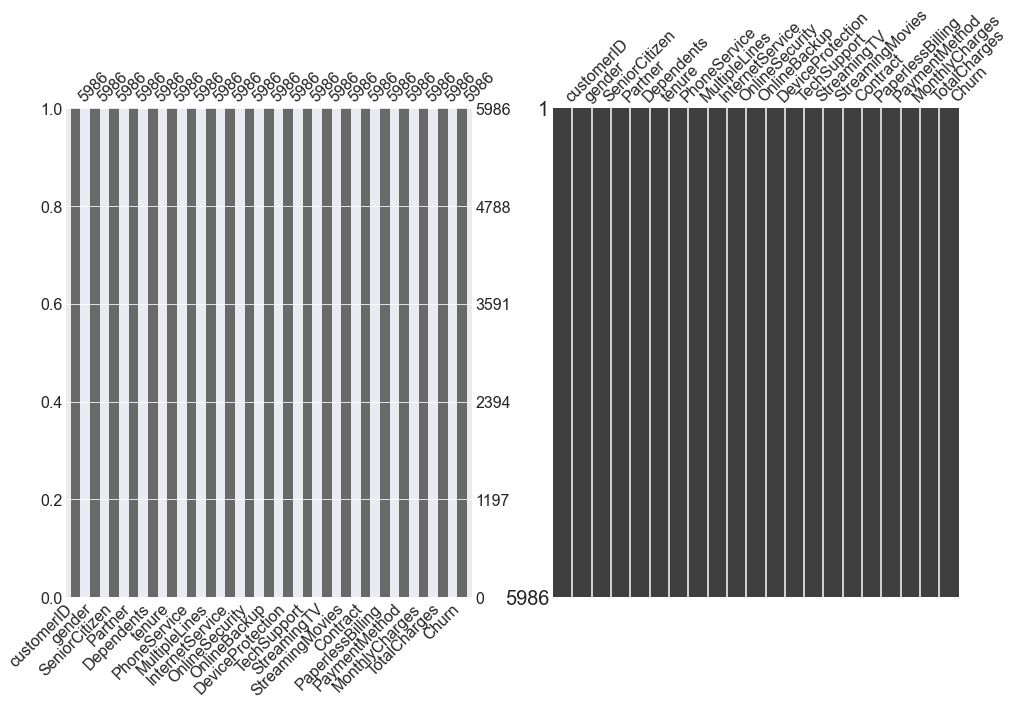

In [7]:
print(telecom_df.isnull().sum())

# создадим один объект Figure и два объекта Axes
fig, axes = plt.subplots(1, 2, figsize=(16, 9))
# теперь отрисуем в axes[0] диаграмму пропущенных значений
msno.bar(telecom_df, figsize=(10, 7), ax=axes[0])
# а в axes[1] отрисуем матрицу пропущенных значений
msno.matrix(telecom_df, figsize=(10, 7), ax=axes[1])
plt.show()

**Вывод:**  
На первый взгляд все отлично, ни одного пропущенного значения.

### 2.3. Изучение состава всех столбцов.

In [8]:
print(telecom_df.dtypes)
### метод describe для числовых данных
print(telecom_df.describe(include=[np.number]))
### метод describe для текстовых данных
print(telecom_df.describe(include=[np.object]))

# глянем на уникальные данные каждого столбца
for column in telecom_df.columns:
    print('Уникальные значения столбца {}:\n{}'.format(column, np.sort(telecom_df[column].unique())))
# столбец SeniorCitizen имеет бинарную шкалу, но из нуля и единиц, приведем к однообразному виду
telecom_df['SeniorCitizen'].replace({0:'No', 1:'Yes'}, inplace=True)
# столбец TotalCharges имеет в своем составе такие значения как ' '. Что это? Пропуск или недосчет? Выясним
print(telecom_df.loc[telecom_df['TotalCharges'] == ' ', :])
# все понятно - это вновь прибывшие клиенты. Заменим их значения на 0
telecom_df.loc[telecom_df['TotalCharges'] == ' ', 'TotalCharges'] = 0
# столбец TotalCharges имеет тип данных - object. Непорядок, сменим на float64
telecom_df['TotalCharges'] = telecom_df['TotalCharges'].astype(np.float64)
# доход компании за весь период датасета
print('Доход компании за весь период датасета:', telecom_df['TotalCharges'].sum())

# выведем наиболее часто встречающиеся значения в столбцах
for column in telecom_df.columns:
    print('Column name:', column)
    print(telecom_df[column].value_counts().nlargest(5), '\n')

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object
       SeniorCitizen       tenure  MonthlyCharges
count    5986.000000  5986.000000     5986.000000
mean        0.161377    32.468760       64.802213
std         0.367909    24.516391       30.114702
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.650000
50%         0.000000    29.000000       70.400000
75%         0.000000    56.000000       89.90000

**Вывод:**  
Первые очевидные результаты и выводы, которые мы можем сделать:
 - В этом датасете содержатся данные о 5986 клиентах компании.
 - 3050 клиентов - мужчины.
 - 4399 людей всё еще клиенты компании.
 - Максимальный срок пользования услугами компании - 72 месяца. Это значит, что данные брались за 6 лет.
 - За 6 лет 5986 клиентов принесли компании почти 14 млн. USD дохода
 - Средняя сумма месячного пользования 64.80 USD и она несколько меньше медианной - 70.40 USD. Это может означать,
 что клиентов, кто платит меньше среднего больше.

### 2.4. Вероятностное распределение каждого столбца.

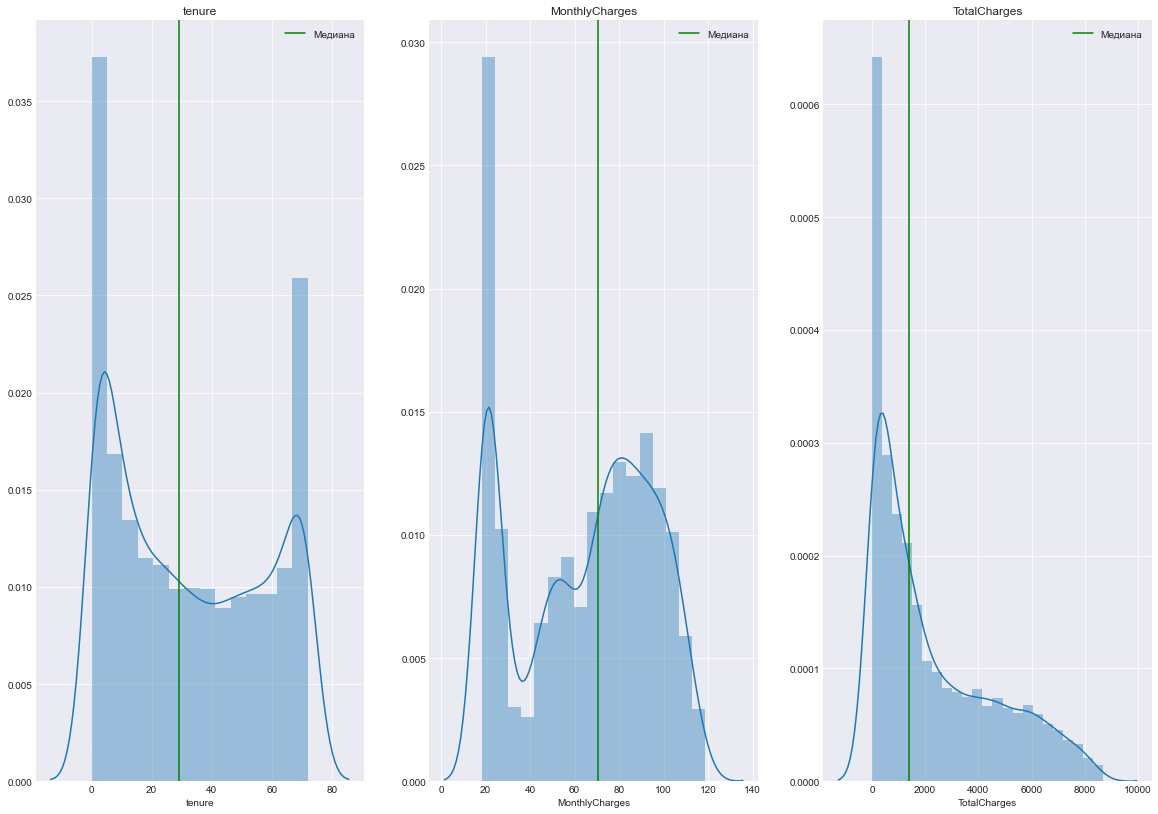

In [9]:
# оставим только столбцы с данными типа int64 и float64
telecom_df_for_dist = telecom_df.loc[:, telecom_df.dtypes!='object']
# а теперь отобразим все на одном графике
fig, axes = plt.subplots(1, len(telecom_df_for_dist.columns), figsize=(20, 14))
for i, column in enumerate(telecom_df_for_dist.columns):
    sns.distplot(telecom_df_for_dist[column], ax=axes[i])
    axes[i].set_title(column)
    axes[i].axvline(telecom_df_for_dist[column].median(), c='g', label='Медиана')
    axes[i].legend(loc='best')
plt.show()

**Вывод:**  
- Выбросы в данных не наблюдаются. В случае с TotalCharges можно наблюдать смещенность в сторону 0.
- Для графиков срока пользования (tenure) и месячной платы (MonthlyCharges) налицо наличие явной кластеризация значений.

### 2.5. Распределение клиентов по основным категориям.

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


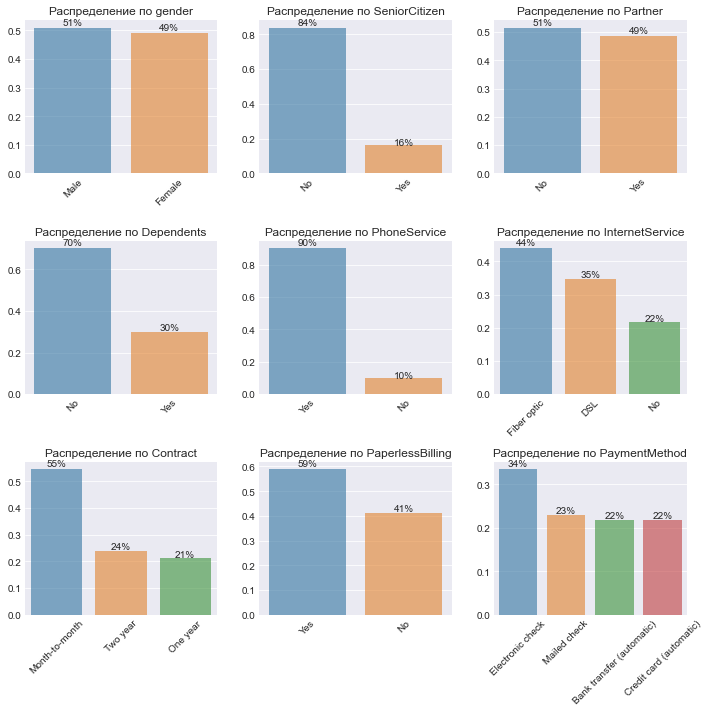

In [10]:
main_columns_1 = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'InternetService', 'Contract',
'PaperlessBilling', 'PaymentMethod']

fig, axes = plt.subplots(3, 3, figsize=(10, 10))
# пройдемся по каждому основному столбцу
for ax, column in zip(axes.ravel(), main_columns_1):
    # посчитаем распределение по уникальным значениям столбца, сразу же нормализуем их
    data = (telecom_df[column].value_counts() / len(telecom_df)).to_frame().reset_index()
    sns.barplot(y=data.columns[1], x='index', data=data, alpha=0.6, ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.set(ylabel=None, xlabel=None)
    ax.set_title(f'Распределение по {column}')
    ax.legend()

    # добавим значения столбцов на диаграммы
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        ax.annotate(f'{height:.0%}', (x+width/2, y+height*1.02), ha='center')

plt.tight_layout()
plt.show()

**Вывод:**  
 - Гендерное распределение клентов почти равное.
 - Большинство клиентов это не пенсионеры.
 - Поровну распределились люди находящиеся в браке и холостые.
 - Большая часть не имеет детей.
 - Почти все клиенты подключены к услуге телефонной связи.
 - Большинство клиентов пользуются услугой интернет-провайдера: из них примерно поровну DSL и Fiber optic типов связи.
 - Большинстов клиентов выбрали month-to-month типом контракта, затем идет двухгодовой контракт и контракт на один год.
 - Безбумажный биллинг предпочли пости 60 % пользователей.
 - Наиболее популярный метод оплаты это electronic check, затем не имея особых отличий идут mailed check, bank transfer, credit card.

### 2.6. Распределение по оттоку.

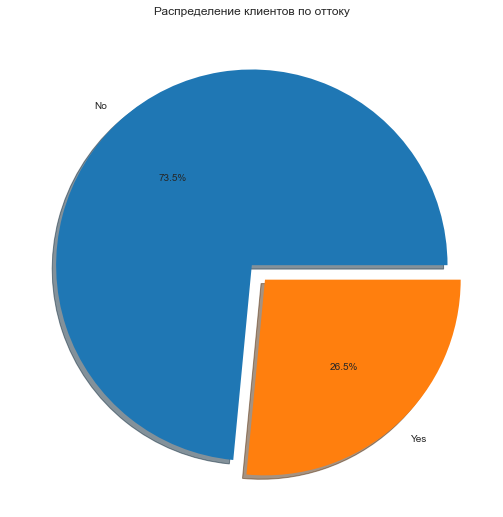

In [11]:
fig, ax = plt.subplots(figsize=(16,9))
telecom_df['Churn'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', shadow=True)
plt.ylabel(None)
plt.title('Распределение клиентов по оттоку')
plt.show()

**Вывод:**  
Как можно заметить большинство остаётся клиентами компании, но 26.5 % все таки расторгли договор с фирмой.
Давайте детальнее взглянем распределение по оттоку в основных категориях.

### 2.7. Распределение клиентов по оттоку внутри основных категорий.
Логика такая, если распределение churn/not churn 73.5% / 26.5%, то и внутри групп должна сохраняться данная пропорция.

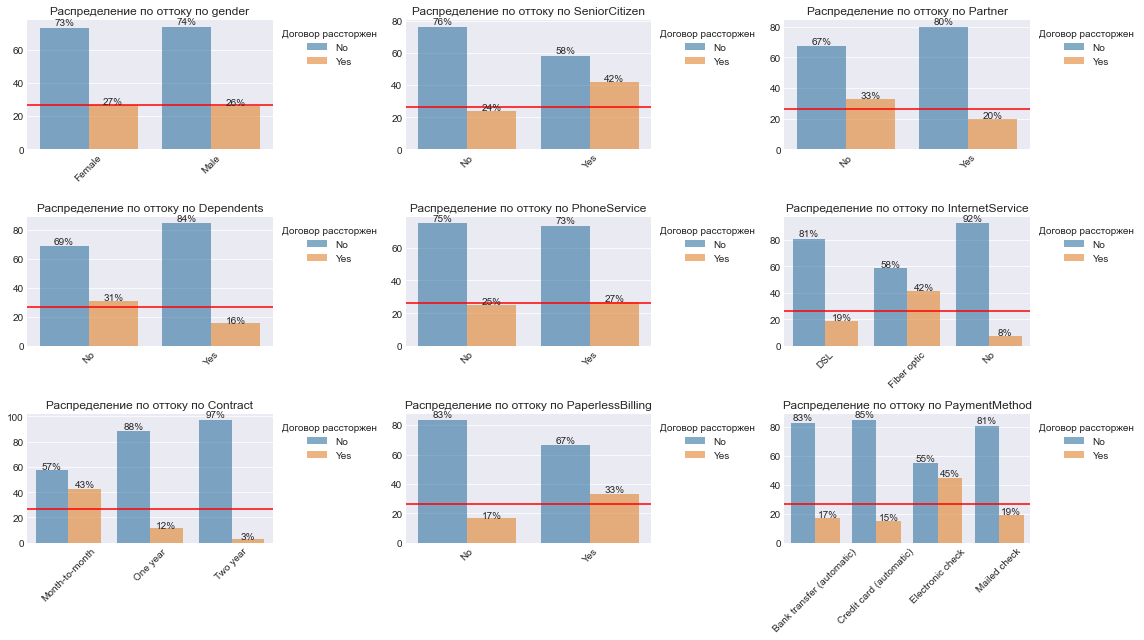

In [12]:
fig, axes = plt.subplots(3, 3, figsize=(16, 9))
for ax, column in zip(axes.ravel(), main_columns_1):
    # нормализация данных
    data = telecom_df\
    .groupby(['Churn', column])[column]\
    .count()\
    .groupby(column).apply(lambda x: 100 * x / x.sum())\
    .to_frame().stack().reset_index()

    sns.barplot(x=column, y=0, hue='Churn', data=data, ax=ax, alpha=0.6)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.set(ylabel=None, xlabel=None)
    ax.set_title(f'Распределение по оттоку по {column}')
    ax.legend(title='Договор рассторжен', loc=2, bbox_to_anchor=(1, 1), fontsize=10)
    # добавим значения столбцов на диаграммы
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        ax.annotate(f'{height/100:.0%}', (x+width/2, y+height*1.02), ha='center')
    # отразим на графике прямую, символизирующую пропорцию между глобальным churn/not churn
    ax.axhline(26.5, c='r')
plt.tight_layout()
plt.show()

**Вывод:** 
- Стоит начать с того, что теория подтвержается на первом же графике: нет причин для того, чтобы мужчины и женщины по-разному относились к услугам связи данной компании.
- Ситуация с пенсионерами как раз обратная: пенсионеры чаще чем молодые люди отказывались от услуг компании. К сожалению, это может быть связано с уходом человека из жизни. А может тарифная линейка не располагает для нужд человека в преклонном возрасте.
- Клиенты фирмы, не состоящие в браке, чаще других рассторгают договор с фирмой. Возможно это связано с рассторжением договора на семейный тариф, а возможно это чистая случайность.
- Клиентов без детей, рассторгших договор с фирмой, относительно больше, чем клиентов с детьми, которые также рассторгли договор. Возможно имеются выгодные семейные тарифы, но нет подходящих тарифов для людей без детей.
- Среди клиентов, пользующихся услугой телефонной связи, не наблюдается отклонения от общей картины.
- А вот клиенты с оптоволоконным подключением к сети интернет, чаще других рассторгают договоры. Может быть качество по данному типу связи у конкурентов лучше? Ну или тарифы выгоднее. Кстати, клиентов фирмы, не пользующихся услугами компании как интернет-провайдера, похоже всё устраивает. Выгодное предложение раздачи интернета телефоном?
- Ожидаемо, что клиенты, заключающие двухлетние контракты будут реже рассторгать договор. С однолетними контрактами аналогичная сиутуация. А вот клиентам, продлевающим контракт каждый месяц, легче его рассторгнуть; чем они непременно пользуются.
- Клиенты, не пользующиеся безбумажным биллингом, реже рассторгают контракт, в отличие от тех, кто предпочел безбумажную форму оплаты. Возможно, стоит посмотреть на сложности в процедуре безбумажной оплаты, клиентам явно это не нравится.
- А вот и конкретика предыдущего пункта. Клиенты, пользующиеся онлайн-оплатой, чаще рассторгают договор с фирмой. Возможно в этом и есть загвоздка.

Итак можно предполагать, что уйдут в первую очередь клиенты SeniorCitizen, InternetService (Fiber optic),
Contract (month-to-month), PaymentMethod (electronic check).

### 2.8. Исследование "увлеченности" клиентов услугами компании.
Взглянем на кол-во подключенных услуг у каждого клиента.

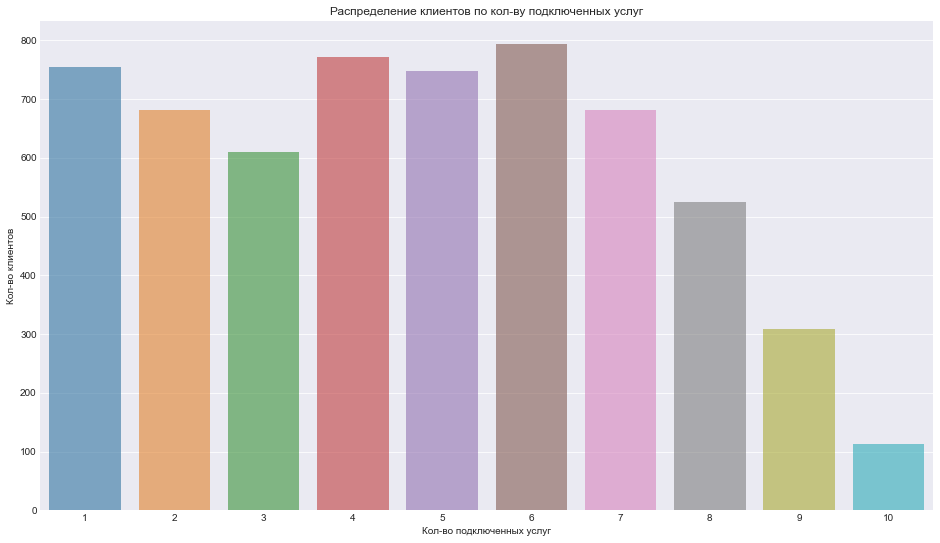

In [13]:
# выберем колонки с услугами
services_columns = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                    'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling']
# заменим текстовые бинарные данные на числовые
telecom_df_for_services_calculation = telecom_df.copy()
telecom_df_for_services_calculation[services_columns] = telecom_df_for_services_calculation[services_columns]\
.replace({'No':0, 'Yes':1, 'No phone service':0, 'Fiber optic':1, 'DSL':1, 'No internet service':0})
# заведем новую колонку в основном датасете
telecom_df['services'] = telecom_df_for_services_calculation[services_columns].sum(axis=1)
# визуализируем результаты
fig, axes = plt.subplots(figsize=(16,9))
sns.barplot(x=telecom_df['services'].value_counts().reset_index()['index'],
            y=telecom_df['services'].value_counts().reset_index()['services'],
            alpha=0.6)
plt.xlabel('Кол-во подключенных услуг')
plt.ylabel('Кол-во клиентов')
plt.title('Распределение клиентов по кол-ву подключенных услуг')
##plt.close()
plt.show()

Посмотрим влияет ли кол-во подключенных услуг на месячные траты абонента.

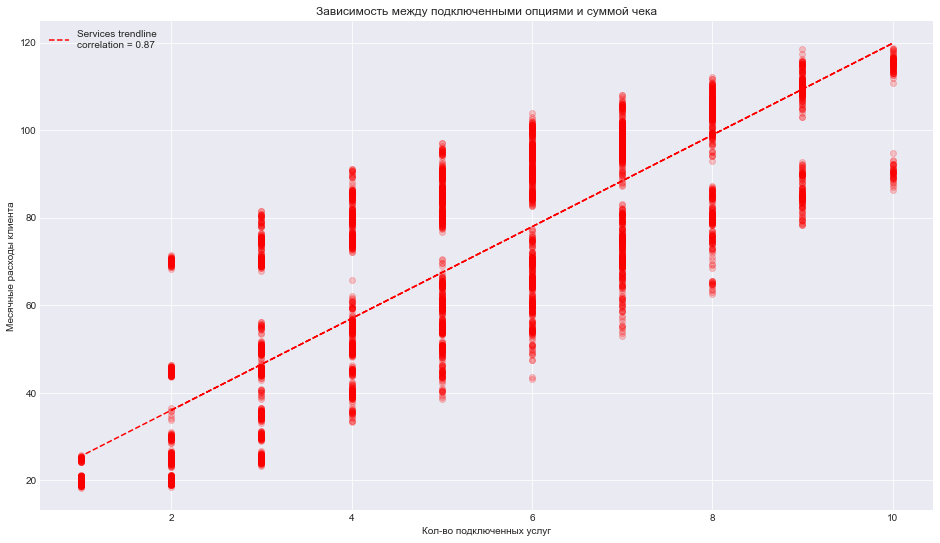

In [14]:
fig, axes = plt.subplots(figsize=(16,9))
plt.scatter(telecom_df['services'], telecom_df['MonthlyCharges'], c='r', alpha=0.2)
# определим линию тренда для большей показательности
# создадим для дальнейшего удобства функцию по определнию линии тренда
def plot_trendline(x, y, degree, color, name):
    trend = np.polyfit(x, y, degree)
    trendline = np.poly1d(trend)
    # вычислим коэффициент корреляции
    coef_corr = x.corr(y)
    return plt.plot(x, trendline(x), f'{color}--', label=f'{name} trendline\ncorrelation = {coef_corr:.2}')

plot_trendline(telecom_df['services'], telecom_df['MonthlyCharges'], 1, 'r', 'Services')
plt.xlabel('Кол-во подключенных услуг')
plt.ylabel('Месячные расходы клиента')
plt.title('Зависимость между подключенными опциями и суммой чека')
plt.legend()
plt.show()

Мы можем наблюдать высокую силу связи между кол-вом подключенных услуг и месячными расходами клиента.  
А теперь стоит взглянуть на распределение оставшихся/ушедших клиентов среди этих групп.

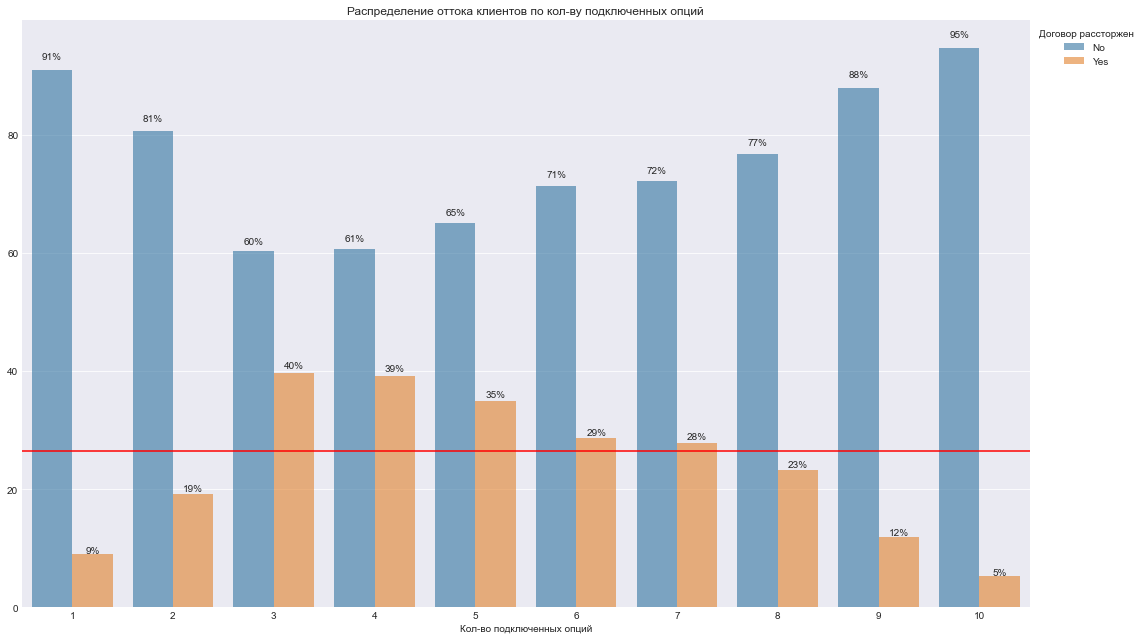

In [15]:
# нормализация данных
data = telecom_df\
.groupby(['Churn', 'services'])['services']\
.count()\
.groupby('services').apply(lambda x: 100 * x / x.sum())\
.to_frame().stack().reset_index()

fig, ax = plt.subplots(figsize=(16, 9))
sns.barplot(x='services', y=0, hue='Churn', data=data, alpha=0.6)
ax.set_xlabel('Кол-во подключенных опций')
ax.set_ylabel(None)
ax.set_title(f'Распределение оттока клиентов по кол-ву подключенных опций')
ax.legend(title='Договор рассторжен', loc=2, bbox_to_anchor=(1, 1), fontsize=10)
# добавим значения столбцов на диаграммы
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height/100:.0%}', (x+width/2, y+height*1.02), ha='center')
# отразим на графике прямую, символизирующую пропорцию между глобальным churn/not churn
ax.axhline(26.5, c='r')
plt.tight_layout()
plt.show()

Можно заметить что высокие показатели оттока у клиентов с 3-5 подключенными услугами

### 2.9. Распределение доходов за весь исследуемый период, полученных от клиентов, внутри основных категорий.
Мало смысла в распределении доходов компании по услугам, которые выбрали клиенты, ведь нельзя сказать, что 34 % из всех
клиентов, кто пользуется электронным чеком для оплаты приносят 31 % доходов компании, это не показательно, хоть это и правда.
В нашем случае лучше обратить наше внимание на категории, которые свойственны именно клиентам, а не их выбору, который,
кстати, за 6 лет мог несколько раз поменяться.

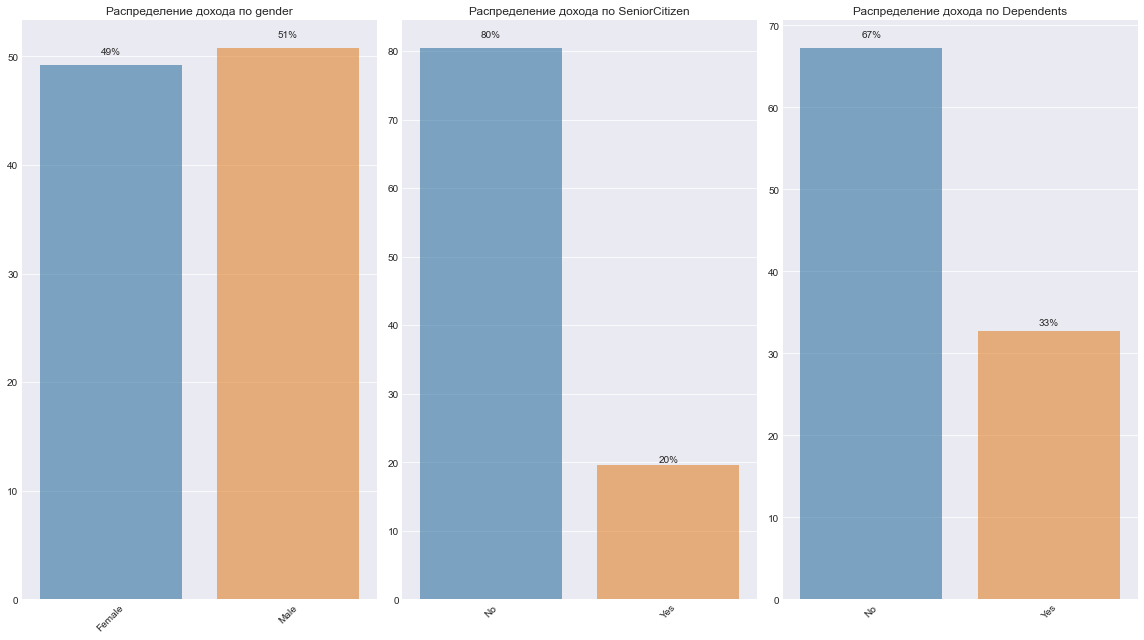

In [16]:
main_columns_2 = ['gender', 'SeniorCitizen', 'Dependents']
fig, axes = plt.subplots(1, 3, figsize=(16, 9))
for ax, column in zip(axes.ravel(), main_columns_2):
    # нормализация данных
    data = telecom_df\
    .groupby([column])[column, 'TotalCharges']\
    .sum()\
    .apply(lambda x: 100 * x / x.sum())\
    .reset_index()

    sns.barplot(x=column, y='TotalCharges', data=data, ax=ax, alpha=0.6)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.set(ylabel=None, xlabel=None)
    ax.set_title(f'Распределение дохода по {column}')
    # добавим значения столбцов на диаграммы
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        ax.annotate(f'{height/100:.0%}', (x+width/2, y+height*1.02), ha='center')

plt.tight_layout()
plt.show()

**Вывод:**  
Как можно видеть у нас гендерная нейтральность в суммарных доходах компании.

### 2.10. Исследование влияния времени пребывания клиентом компании на размер месячного чека.  
Посмотрим на зависимость размера месячного чека от того, сколько месяцев человек являлся клиентом компании.

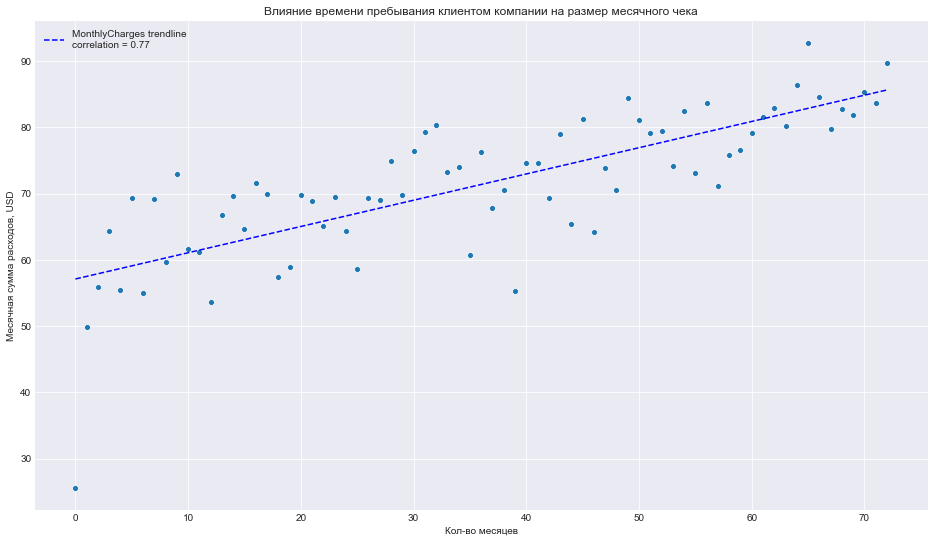

In [17]:
# сгруппируем клиентов по месяцам и найдем медиану каждой группы
telecom_df_for_monthlycharges_by_tenure = telecom_df[['tenure', 'MonthlyCharges']]\
                                          .groupby('tenure').median().reset_index()
x = telecom_df_for_monthlycharges_by_tenure['tenure']
y = telecom_df_for_monthlycharges_by_tenure['MonthlyCharges']
# нанесём результат каждого месяца
fig, ax = plt.subplots(figsize=(16, 9))
sns.scatterplot(x=x, y=y)
# определим линию тренда для большей показательности
plot_trendline(x, y, 1, 'b', 'MonthlyCharges')
plt.title('Влияние времени пребывания клиентом компании на размер месячного чека')
plt.xlabel('Кол-во месяцев')
plt.ylabel('Месячная сумма расходов, USD')
plt.legend()
plt.show()

**Вывод:**  
Как видно из графика: чем дольше люди являются клиентами компании, тем больше они тратят в месяц на услуги компании.

Будет интересно посмотреть на подобное поведение через призму подключенных услуг. Начнём с разделения по наличию
подключенной услуги телефонной связи.

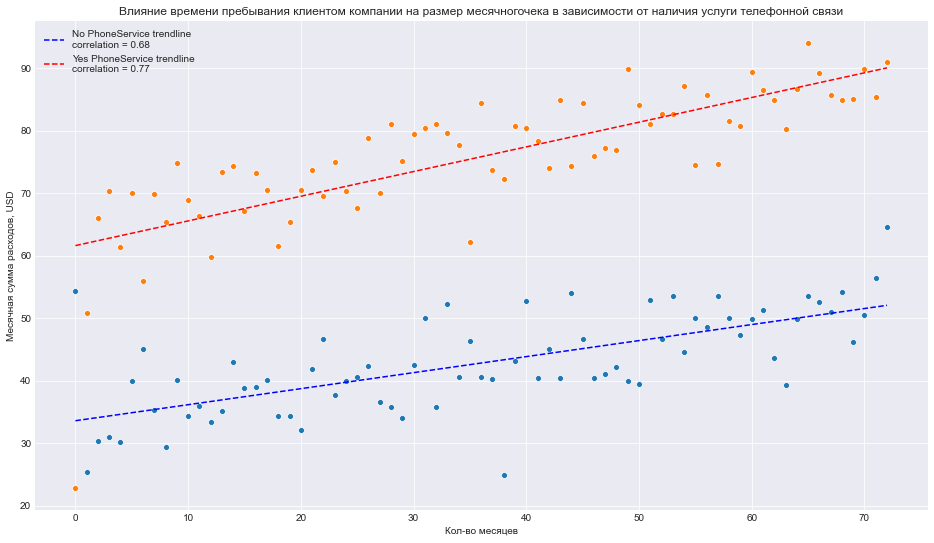

In [18]:
# теперь уже сгруппируем клиентов по месяцам и наличию подключенной услуги телефонной связи, затем найдем медиану каждой группы
telecom_df_for_monthlycharges_by_tenure_phoneservice = telecom_df[['PhoneService', 'tenure', 'MonthlyCharges']]\
                                          .groupby(['PhoneService', 'tenure']).median().reset_index()
x_0 = telecom_df_for_monthlycharges_by_tenure_phoneservice\
[telecom_df_for_monthlycharges_by_tenure_phoneservice['PhoneService'] == 'No']\
['tenure']
y_0 = telecom_df_for_monthlycharges_by_tenure_phoneservice\
[telecom_df_for_monthlycharges_by_tenure_phoneservice['PhoneService'] == 'No']\
['MonthlyCharges']
x_1 = telecom_df_for_monthlycharges_by_tenure_phoneservice\
[telecom_df_for_monthlycharges_by_tenure_phoneservice['PhoneService'] == 'Yes']\
['tenure']
y_1 = telecom_df_for_monthlycharges_by_tenure_phoneservice\
[telecom_df_for_monthlycharges_by_tenure_phoneservice['PhoneService'] == 'Yes']\
['MonthlyCharges']
# нанесём результат каждого месяца
fig, ax = plt.subplots(figsize=(16, 9))
sns.scatterplot(x=x_0, y=y_0)
sns.scatterplot(x=x_1, y=y_1)
# определим линию тренда для большей показательности
plot_trendline(x_0, y_0, 1, 'b', 'No PhoneService')
plot_trendline(x_1, y_1, 1, 'r', 'Yes PhoneService')
##plot_trendline(x, y, 1, 'g', 'Base')
plt.title('Влияние времени пребывания клиентом компании на размер месячного\
чека в зависимости от наличия услуги телефонной связи')
plt.xlabel('Кол-во месяцев')
plt.ylabel('Месячная сумма расходов, USD')
plt.legend()
plt.show()

Собственно ничего удивительного. Абоненты, кто подключил услугу телефонной связи платят больше, чем те, кто отказался от неё.  
А теперь взглянем как обстоят дела с теми, кто пользуется услугой интернет-провайдера.

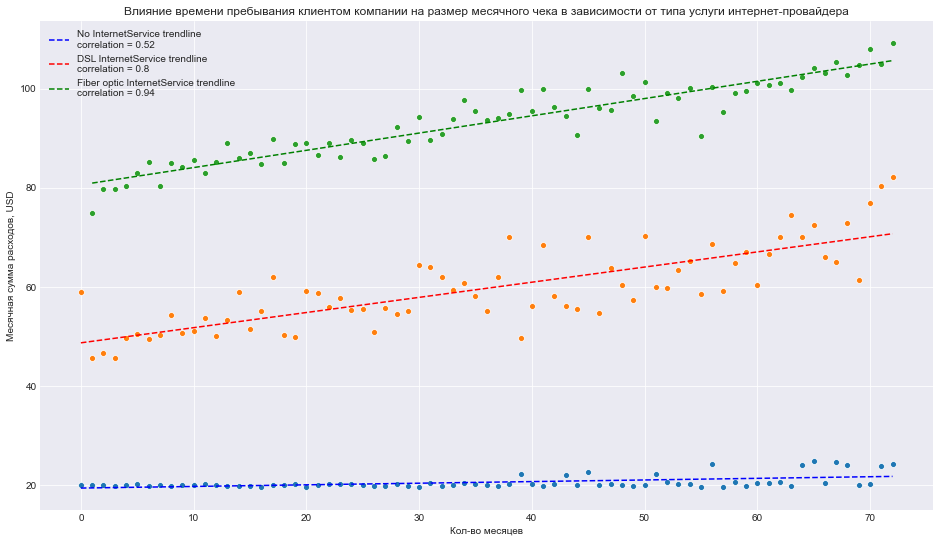

In [19]:
# теперь уже сгруппируем клиентов по месяцам и наличию подключенной услуги интернет-провайдера, затем найдем медиану каждой
# группы
telecom_df_for_monthlycharges_by_tenure_internetservice =\
telecom_df[['InternetService', 'tenure', 'MonthlyCharges']].groupby(['InternetService', 'tenure']).median().reset_index()
x_0 = telecom_df_for_monthlycharges_by_tenure_internetservice\
[telecom_df_for_monthlycharges_by_tenure_internetservice['InternetService'] == 'No']['tenure']
y_0 = telecom_df_for_monthlycharges_by_tenure_internetservice\
[telecom_df_for_monthlycharges_by_tenure_internetservice['InternetService'] == 'No']['MonthlyCharges']
x_1 = telecom_df_for_monthlycharges_by_tenure_internetservice\
[telecom_df_for_monthlycharges_by_tenure_internetservice['InternetService'] == 'DSL']['tenure']
y_1 = telecom_df_for_monthlycharges_by_tenure_internetservice\
[telecom_df_for_monthlycharges_by_tenure_internetservice['InternetService'] == 'DSL']['MonthlyCharges']
x_2 = telecom_df_for_monthlycharges_by_tenure_internetservice\
[telecom_df_for_monthlycharges_by_tenure_internetservice['InternetService'] == 'Fiber optic']['tenure']
y_2 = telecom_df_for_monthlycharges_by_tenure_internetservice\
[telecom_df_for_monthlycharges_by_tenure_internetservice['InternetService'] == 'Fiber optic']['MonthlyCharges']
# нанесём результат каждого месяца
fig, ax = plt.subplots(figsize=(16, 9))
sns.scatterplot(x=x_0, y=y_0)
sns.scatterplot(x=x_1, y=y_1)
sns.scatterplot(x=x_2, y=y_2)
# определим линию тренда для большей показательности
plot_trendline(x_0, y_0, 1, 'b', 'No InternetService')
plot_trendline(x_1, y_1, 1, 'r', 'DSL InternetService')
plot_trendline(x_2, y_2, 1, 'g', 'Fiber optic InternetService')
plt.title('Влияние времени пребывания клиентом компании на размер месячного чека в зависимости от типа услуги интернет-провайдера')
plt.xlabel('Кол-во месяцев')
plt.ylabel('Месячная сумма расходов, USD')
plt.legend()
plt.show()

Опять можно наблюдать логическое распределение по расходам в зависимости от типа услуги: абоненты, кто отказался от услуги
интернет-провайдера платят меньше тех, кто подключил эту услугу. А из тех, кто пользуется этой услугой, больше платят
пользователи оптоволоконного интернета.  
Пора посмотреть как распределятся данные для тех, кто рассторг договор, и тех, кто продолжает пользоваться услугами компании.

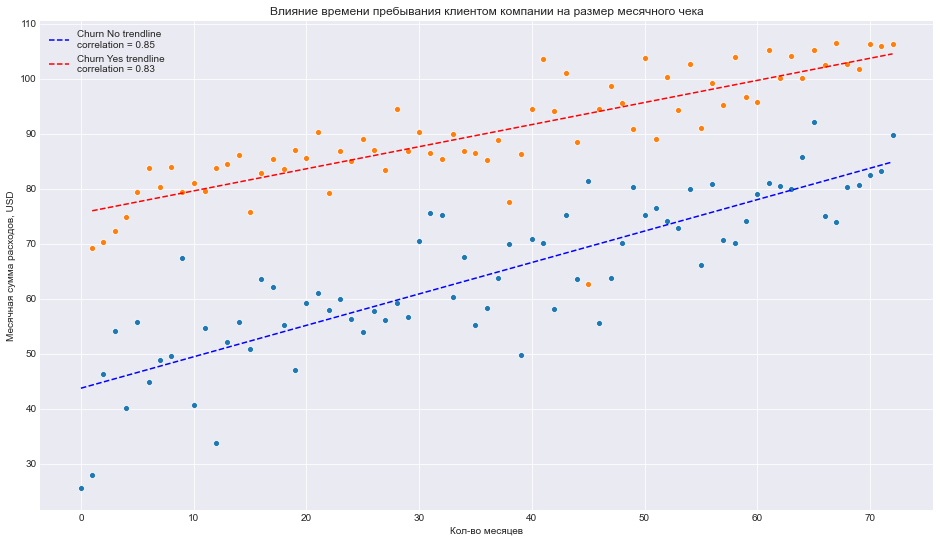

In [20]:
# теперь уже сгруппируем клиентов по месяцам и оттоку и найдем медиану каждой группы
telecom_df_for_monthlycharges_by_tenure_churn = telecom_df[['Churn', 'tenure', 'MonthlyCharges']]\
                                          .groupby(['Churn', 'tenure']).median().reset_index()
x_0 =\
telecom_df_for_monthlycharges_by_tenure_churn[telecom_df_for_monthlycharges_by_tenure_churn['Churn'] == 'No']['tenure']
y_0 =\
telecom_df_for_monthlycharges_by_tenure_churn[telecom_df_for_monthlycharges_by_tenure_churn['Churn'] == 'No']['MonthlyCharges']
x_1 =\
telecom_df_for_monthlycharges_by_tenure_churn[telecom_df_for_monthlycharges_by_tenure_churn['Churn'] == 'Yes']['tenure']
y_1 =\
telecom_df_for_monthlycharges_by_tenure_churn[telecom_df_for_monthlycharges_by_tenure_churn['Churn'] == 'Yes']['MonthlyCharges']
# нанесём результат каждого месяца
fig, ax = plt.subplots(figsize=(16, 9))
sns.scatterplot(x=x_0, y=y_0)
sns.scatterplot(x=x_1, y=y_1)
# определим линию тренда для большей показательности
plot_trendline(x_0, y_0, 1, 'b', 'Churn No')
plot_trendline(x_1, y_1, 1, 'r', 'Churn Yes')
plt.title('Влияние времени пребывания клиентом компании на размер месячного чека')
plt.xlabel('Кол-во месяцев')
plt.ylabel('Месячная сумма расходов, USD')
plt.legend()
# plt.close()
plt.show()

Похоже мы нашли что-то значимое. На лицо явная кластеризация по медианной месячной сумме чека. Люди, отказавшиеся от услуг
компании, тратили явно больше, чем те, кто остался её клиентом.

### 2.11. Исследование влияния времени пребывания клиентом компании на кол-во подключенных опций.
Давайте посмотри как влияет время пребывания клиентом компании на кол-во подключенных опций.

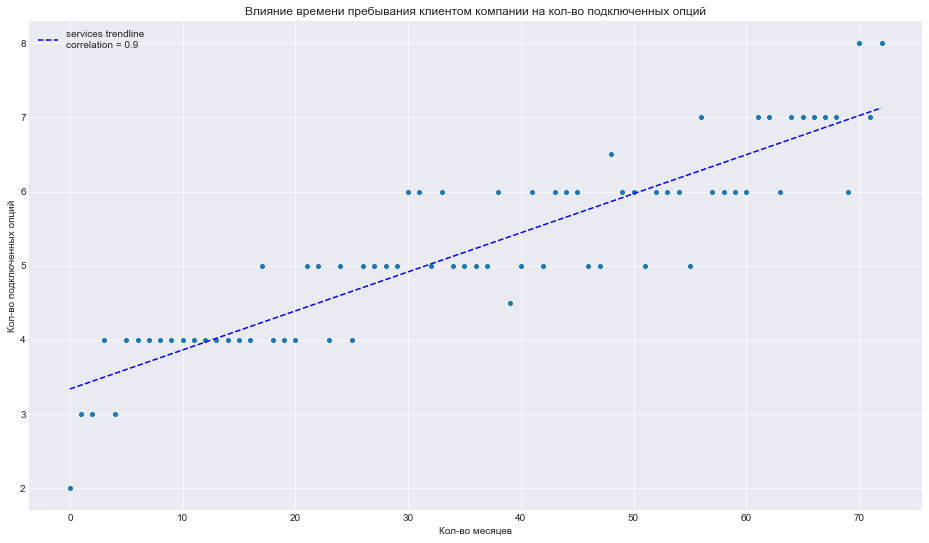

In [21]:
# сгруппируем клиентов по месяцам и найдем медиану каждой группы
telecom_df_for_services_by_tenure = telecom_df[['tenure', 'services']]\
                                          .groupby('tenure').median().reset_index()
x = telecom_df_for_services_by_tenure['tenure']
y = telecom_df_for_services_by_tenure['services']
# нанесём результат каждого месяца
fig, ax = plt.subplots(figsize=(16, 9))
sns.scatterplot(x=x, y=y)
# определим линию тренда для большей показательности
plot_trendline(x, y, 1, 'b', 'services')
plt.title('Влияние времени пребывания клиентом компании на кол-во подключенных опций')
plt.xlabel('Кол-во месяцев')
plt.ylabel('Кол-во подключенных опций')
plt.legend()
# plt.close()
plt.show()

По графику видно, что со временем клиенты начинают пользоваться все большим кол-вом услуг компании.  
Давайте взглянем на распределение по наличию услуги телефонной связи.

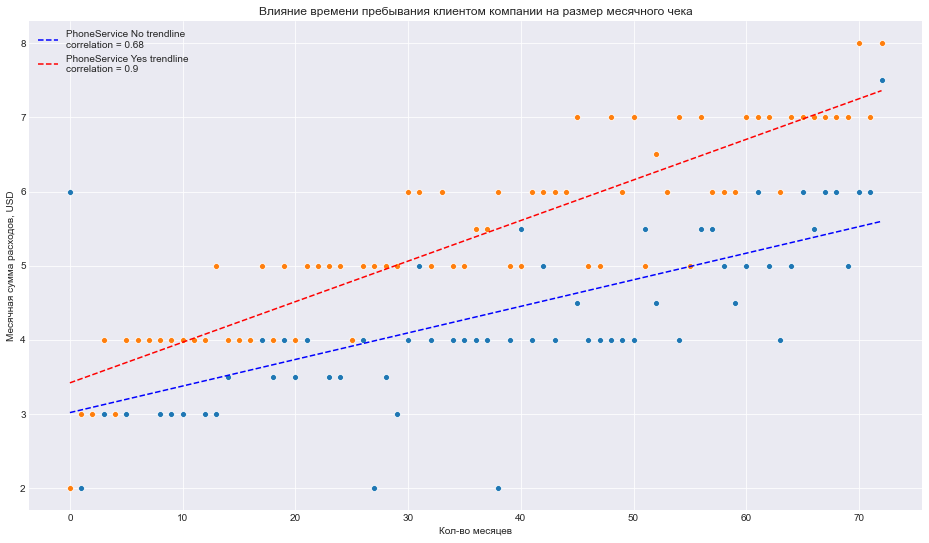

In [22]:
# сгруппируем клиентов по месяцам и найдем медиану каждой группы
telecom_df_for_services_by_tenure_phoneservice = telecom_df[['PhoneService', 'tenure', 'services']]\
                                          .groupby(['PhoneService', 'tenure']).median().reset_index()
x_0 =\
telecom_df_for_services_by_tenure_phoneservice\
[telecom_df_for_services_by_tenure_phoneservice['PhoneService'] == 'No']\
['tenure']
y_0 =\
telecom_df_for_services_by_tenure_phoneservice\
[telecom_df_for_services_by_tenure_phoneservice['PhoneService'] == 'No']\
['services']
x_1 =\
telecom_df_for_services_by_tenure_phoneservice\
[telecom_df_for_services_by_tenure_phoneservice['PhoneService'] == 'Yes']\
['tenure']
y_1 =\
telecom_df_for_services_by_tenure_phoneservice\
[telecom_df_for_services_by_tenure_phoneservice['PhoneService'] == 'Yes']\
['services']
# нанесём результат каждого месяца
fig, ax = plt.subplots(figsize=(16, 9))
sns.scatterplot(x=x_0, y=y_0)
sns.scatterplot(x=x_1, y=y_1)
# определим линию тренда для большей показательности
plot_trendline(x_0, y_0, 1, 'b', 'PhoneService No')
plot_trendline(x_1, y_1, 1, 'r', 'PhoneService Yes')
plt.title('Влияние времени пребывания клиентом компании на размер месячного чека')
plt.xlabel('Кол-во месяцев')
plt.ylabel('Месячная сумма расходов, USD')
plt.legend()
plt.show()

Давайте взглянем на распределение по наличию услуги интернет-провайдера.

In [23]:
# сгруппируем клиентов по месяцам и найдем медиану каждой группы
telecom_df_for_services_by_tenure_internetservice = telecom_df[['InternetService', 'tenure', 'services']]\
                                          .groupby(['InternetService', 'tenure']).median().reset_index()
x_0 = telecom_df_for_services_by_tenure_internetservice\
[telecom_df_for_services_by_tenure_internetservice['InternetService'] == 'No']\
['tenure']
y_0 = telecom_df_for_services_by_tenure_internetservice\
[telecom_df_for_services_by_tenure_internetservice['InternetService'] == 'No']\
['services']
x_1 = telecom_df_for_services_by_tenure_internetservice\
[telecom_df_for_services_by_tenure_internetservice['InternetService'] == 'DSL']\
['tenure']
y_1 = telecom_df_for_services_by_tenure_internetservice\
[telecom_df_for_services_by_tenure_internetservice['InternetService'] == 'DSL']\
['services']
x_2 = telecom_df_for_services_by_tenure_internetservice\
[telecom_df_for_services_by_tenure_internetservice['InternetService'] == 'Fiber optic']\
['tenure']
y_2 = telecom_df_for_services_by_tenure_internetservice\
[telecom_df_for_services_by_tenure_internetservice['InternetService'] == 'Fiber optic']\
['services']
# нанесём результат каждого месяца
fig, ax = plt.subplots(figsize=(16, 9))
sns.scatterplot(x=x_0, y=y_0)
sns.scatterplot(x=x_1, y=y_1)
sns.scatterplot(x=x_2, y=y_2)
# определим линию тренда для большей показательности
plot_trendline(x_0, y_0, 1, 'b', 'No InternetService')
plot_trendline(x_1, y_1, 1, 'r', 'DSL InternetService')
plot_trendline(x_2, y_2, 1, 'g', 'Fiber optic InternetService')
plt.title('Влияние времени пребывания клиентом компании на размер месячного чека')
plt.xlabel('Кол-во месяцев')
plt.ylabel('Месячная сумма расходов, USD')
plt.legend()
plt.close()
plt.show()

А теперь взглянем на самое интересное распределение - по оттоку.

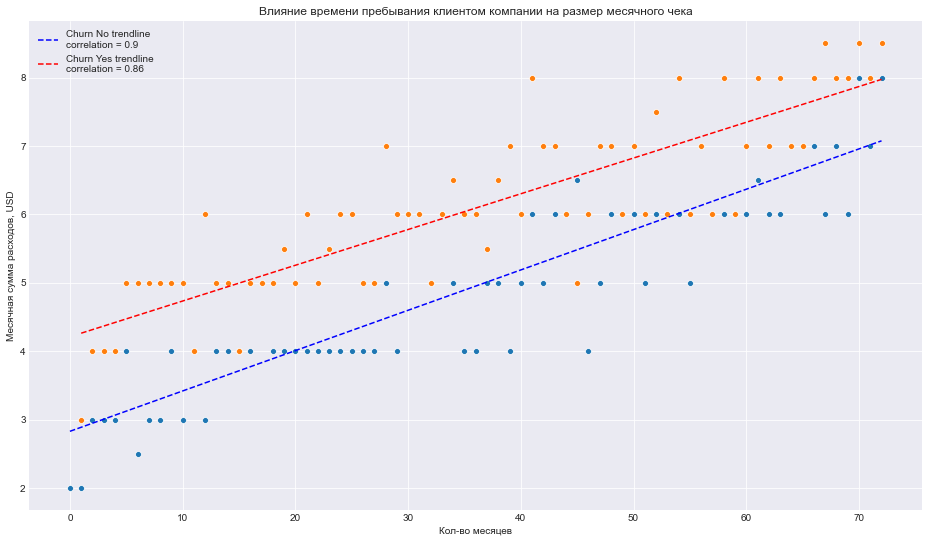

In [24]:
# теперь уже сгруппируем клиентов по месяцам и оттоку и найдем медиану каждой группы
telecom_df_for_services_by_tenure_churn = telecom_df[['Churn', 'tenure', 'services']]\
                                          .groupby(['Churn', 'tenure']).median().reset_index()
x_0 =\
telecom_df_for_services_by_tenure_churn[telecom_df_for_services_by_tenure_churn['Churn'] == 'No']['tenure']
y_0 =\
telecom_df_for_services_by_tenure_churn[telecom_df_for_services_by_tenure_churn['Churn'] == 'No']['services']
x_1 =\
telecom_df_for_services_by_tenure_churn[telecom_df_for_services_by_tenure_churn['Churn'] == 'Yes']['tenure']
y_1 =\
telecom_df_for_services_by_tenure_churn[telecom_df_for_services_by_tenure_churn['Churn'] == 'Yes']['services']
# нанесём результат каждого месяца
fig, ax = plt.subplots(figsize=(16, 9))
sns.scatterplot(x=x_0, y=y_0)
sns.scatterplot(x=x_1, y=y_1)
# определим линию тренда для большей показательности
plot_trendline(x_0, y_0, 1, 'b', 'Churn No')
plot_trendline(x_1, y_1, 1, 'r', 'Churn Yes')
plt.title('Влияние времени пребывания клиентом компании на размер месячного чека')
plt.xlabel('Кол-во месяцев')
plt.ylabel('Месячная сумма расходов, USD')
plt.legend()
plt.show()

Интересно заметить, что клиенты с большим кол-вом подключенных услуг чаще рассторгали договор с компанией.

### 2.12. Корреляционный анализ.
**2.12.1. Корреляционный анализ количественных данных.**

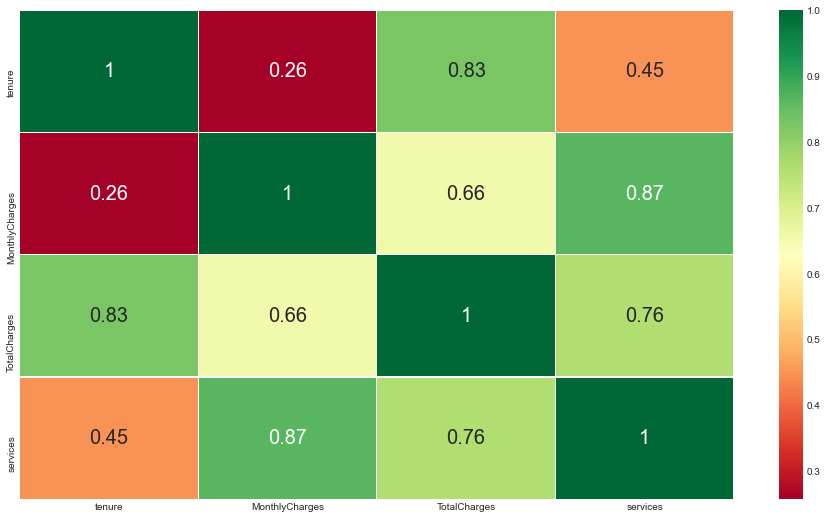

In [25]:
fig, ax = plt.subplots(figsize=(16, 9))
sns.heatmap(telecom_df[['tenure', 'MonthlyCharges', 'TotalCharges', 'services']].corr(), annot=True, cmap='RdYlGn',\
            linewidths=0.2, annot_kws={'size':20})
plt.show()

**Вывод:**  
Как можно заметить почти все столбцы коррелируют между собой. Стоит исключить из дальнейшего обучения столбцы TotalCharges и services.

**2.12.2. Корреляционный анализ категориальных данных.**

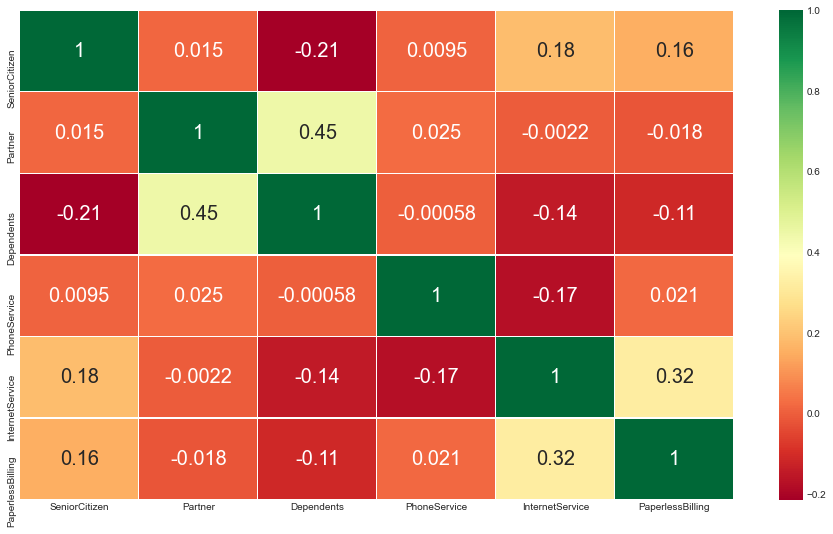

In [26]:
from sklearn.metrics import matthews_corrcoef


# создадим отдельный датасет
telecom_df_for_corr = telecom_df.copy()
# сначала заменим в колонке InternetService, 'Fiber optic' и 'DSL' на 'Yes'
telecom_df_for_corr['InternetService'].replace({'Fiber optic':'Yes', 'DSL':'Yes'}, inplace=True)
# давайте выберем столбцы для дальнейшего анализа
matthew_corr_columns_1 = ['SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'InternetService', 'PaperlessBilling']
# создадим функцию, которая составляет корреляционный датасет
def matthews_corr(df):
    corr_dict = {column:[] for column in df.columns}
    for column_1 in df.columns:
        for column_2 in df.columns:
            corr_dict[column_1] += [matthews_corrcoef(df[column_1], df[column_2])]
    corr_df = pd.DataFrame(data=corr_dict, index=df.columns, columns=df.columns)
    return corr_df

fig, ax = plt.subplots(figsize=(16, 9))
sns.heatmap(\
matthews_corr(telecom_df_for_corr[matthew_corr_columns_1]),
annot=True, cmap='RdYlGn', linewidths=0.2, annot_kws={'size':20})
plt.show()

Между данными столбцами нет почти никакой корреляции, кроме столбцов 'Dependents' и 'Partner'.  
Давайте взглянем на корреляцию внутри категорий, связанных с InternetService.

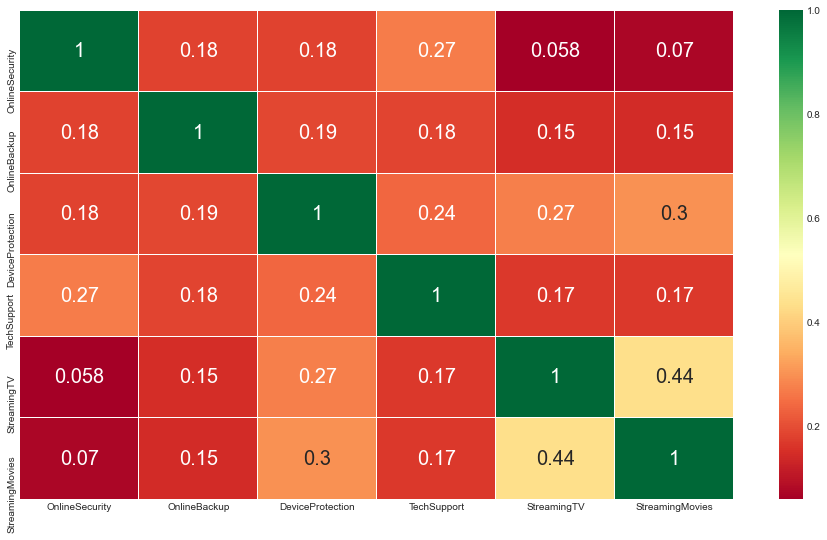

In [27]:
telecom_df_for_corr_IS = telecom_df_for_corr[['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                                              'TechSupport', 'StreamingTV', 'StreamingMovies']]
telecom_df_for_corr_IS = telecom_df_for_corr_IS[telecom_df_for_corr_IS != 'No internet service']
telecom_df_for_corr_IS.dropna(inplace=True)
telecom_df_for_corr_IS
# matthew_corr_columns_2 = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

fig, ax = plt.subplots(figsize=(16, 9))
sns.heatmap(\
matthews_corr(telecom_df_for_corr_IS),
annot=True, cmap='RdYlGn', linewidths=0.2, annot_kws={'size':20})
plt.show()

В исследуемых столбцах таже не замечено корреляции, кроме столбцов 'StreamingTV' и 'StreamingMovies', там наблюдается слабая корреляция. Но это и логично.  
___

# Подготовка данных.
## 1. Добавление новых признаков.

In [28]:
# взглянем на данные в столбцах
for column in telecom_df.columns:
    print(f'Колонка {column}, {len(telecom_df[column].unique())} уникальных значений')
    print(telecom_df[column].unique())

Колонка customerID, 5986 уникальных значений
['7010-BRBUU' '9688-YGXVR' '9286-DOJGF' ... '8044-BGWPI' '7450-NWRTR'
 '4795-UXVCJ']
Колонка gender, 2 уникальных значений
['Male' 'Female']
Колонка SeniorCitizen, 2 уникальных значений
['No' 'Yes']
Колонка Partner, 2 уникальных значений
['Yes' 'No']
Колонка Dependents, 2 уникальных значений
['Yes' 'No']
Колонка tenure, 73 уникальных значений
[72 44 38  4  2 70 33  1 39 55 52 30 60 50 32 51 69 42 14 62  5 63 67 40
 65 16 46 11 49 68 10 53 54 15  3 71  8 64 57 20 26 31  7 35  6 13 23  9
 45 17 34 58 12 25 28 29 43 19 41 37 27 22 24 18 56 66 59 48 47 61 21  0
 36]
Колонка PhoneService, 2 уникальных значений
['Yes' 'No']
Колонка MultipleLines, 3 уникальных значений
['Yes' 'No' 'No phone service']
Колонка InternetService, 3 уникальных значений
['No' 'Fiber optic' 'DSL']
Колонка OnlineSecurity, 3 уникальных значений
['No internet service' 'No' 'Yes']
Колонка OnlineBackup, 3 уникальных значений
['No internet service' 'Yes' 'No']
Колонка DeviceProt

### 1.1. Колонка tenure.
Начнём по порядку - с колонки tenure. Здесь показано сколько месяцев человек являлся клиентом компании за 6 лет.
Вот и сократим до годов.

In [29]:
telecom_df['tenure_years'] = pd.cut(telecom_df['tenure'], 6, labels=range(1, 7))

### 1.2. Исследование в распределения в столбце MontlyCharges.

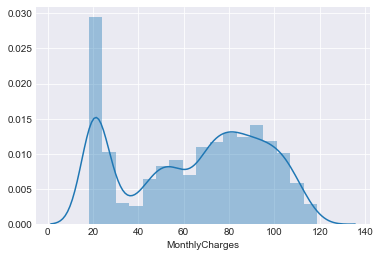

In [30]:
sns.distplot(telecom_df['MonthlyCharges'])
plt.show()

Наблюдается наличие кластеров в столбце 'MonthlyCharges'. Попробуем выделить данные кластеры.

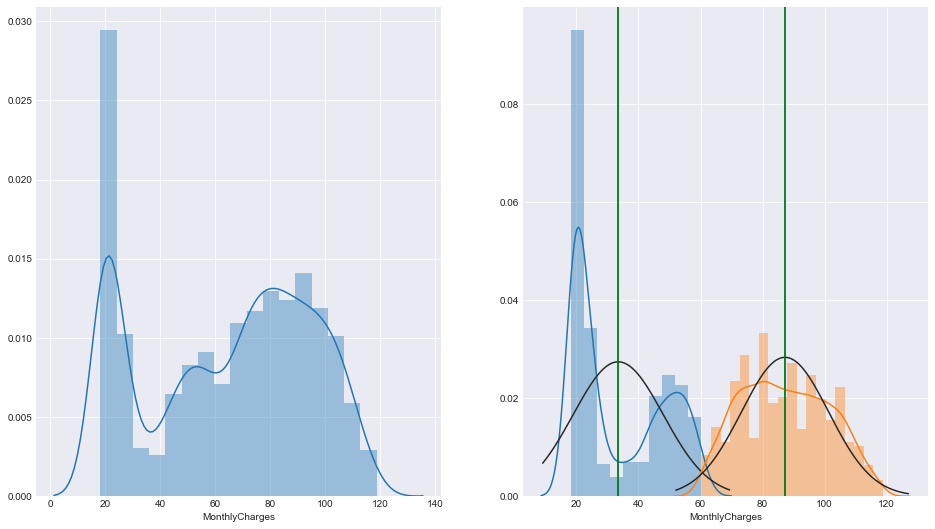

In [31]:
from sklearn.cluster import KMeans


fig, axes = plt.subplots(1, 2, figsize=(16, 9))
sns.distplot(telecom_df['MonthlyCharges'], ax=axes[0])
km_ = KMeans(n_clusters=2, random_state=0)
km_model = km_.fit(np.array(telecom_df['MonthlyCharges']).reshape(-1, 1))
telecom_df['MonthlyCharges_group'] = km_model.labels_
cluster_centers = km_model.cluster_centers_.ravel()
for i in cluster_centers:
    plt.axvline(i)
for i, (group, cluster_center) in enumerate(zip(telecom_df.groupby('MonthlyCharges_group')['MonthlyCharges'], cluster_centers)):
    sns.distplot(group[1], ax=axes[1], fit=norm)
    axes[1].axvline(cluster_center, c='g')
plt.show()

Первый кластер (левый) явно содержит в себе ещё два. Исследуем первый кластер отдельно.

[87.16366495 50.56627431 22.48928337]


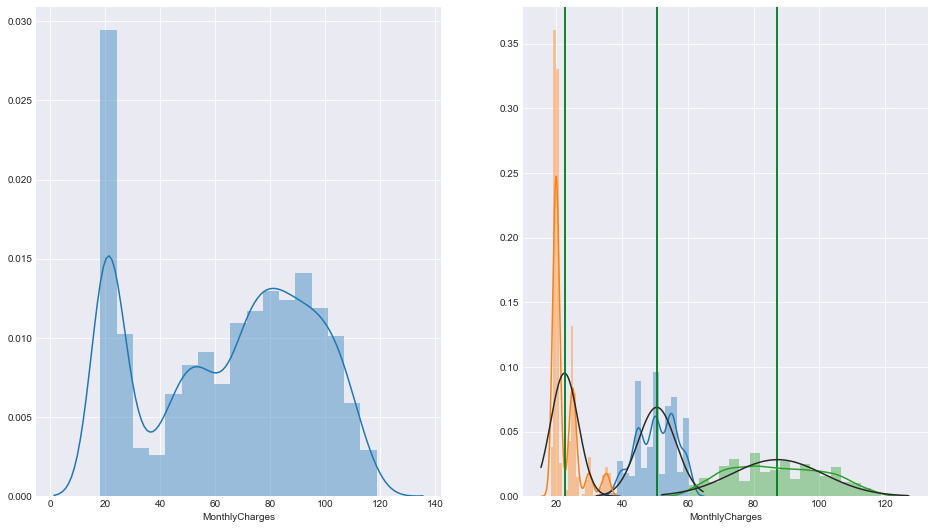

In [32]:
# сначала пометим второй кластер как третий (ведь их скоро станет три)
telecom_df.loc[telecom_df['MonthlyCharges_group']==1, 'MonthlyCharges_group'] = 2
telecom_df_for_dist_1 = telecom_df[telecom_df['MonthlyCharges_group']==0]
km__ = KMeans(n_clusters=2, random_state=0)
km_model_ = km__.fit(np.array(telecom_df_for_dist_1['MonthlyCharges']).reshape(-1, 1))
telecom_df.loc[telecom_df['MonthlyCharges_group']==0, 'MonthlyCharges_group'] = km_model_.labels_
cluster_centers_ = np.r_[cluster_centers[1], km_model_.cluster_centers_.ravel()]
print(cluster_centers_)
# отобразим результат
fig, axes = plt.subplots(1, 2, figsize=(16, 9))
sns.distplot(telecom_df['MonthlyCharges'], ax=axes[0])
for i in cluster_centers_:
    plt.axvline(i)
for i, (group, cluster_center) in enumerate(zip(telecom_df.groupby('MonthlyCharges_group')['MonthlyCharges'], cluster_centers_)):
    sns.distplot(group[1], ax=axes[1], fit=norm)
    axes[1].axvline(cluster_center, c='g')
plt.show()

### 1.3. Результат исследования влияния времени пребывания клиентом компании на размер месячного чека относительно оттока.
Далее мы пометим как high_risk_by_monthlycharges клиентов, которые заметно выделялись в пункте 2.9. про отток.

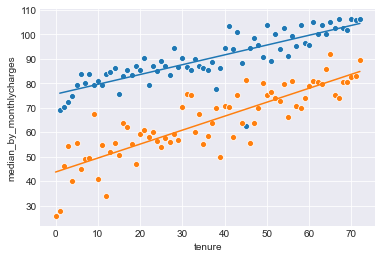

In [33]:
# сначала поднимем столбец с медианами
telecom_df_for_monthlycharges_by_tenure_churn.rename(columns={'MonthlyCharges': 'median_by_monthlycharges'}, inplace=True)
# затем посмотрим на сгруппированые значения
telecom_df_for_monthlycharges_by_tenure_churn['values'] = telecom_df[['Churn', 'tenure', 'MonthlyCharges']]\
                                                .groupby(['Churn', 'tenure'])['MonthlyCharges'].apply(list)\
                                                .reset_index()['MonthlyCharges']
# распределим по группам оттока
telecom_df_for_monthlycharges_by_tenure_churn['clusters_centers'] = 0
for churn in ['Yes', 'No']:
    # заведем переменные, куда внесём группы по оттоку
    data = telecom_df_for_monthlycharges_by_tenure_churn[telecom_df_for_monthlycharges_by_tenure_churn['Churn'] == churn]
    x = data['tenure']
    y = data['median_by_monthlycharges']
    # расчитаем тренд каждой группы
    trend_model = np.polyfit(x, y, 1)
    trendline = np.poly1d(trend_model)
    # заведём новый столбец со значенями центров кластеров
    telecom_df_for_monthlycharges_by_tenure_churn\
    .loc[telecom_df_for_monthlycharges_by_tenure_churn['Churn'] == churn, 'clusters_centers'] = trendline(x)
    # отобразим результат для проверки
    sns.scatterplot(x, y)
    plt.plot(x, trendline(x))
plt.show()

In [34]:
# а теперь сгруппируем просто по tenure, таким образом объединим центры двух класетров
telecom_df_for_high_risk_groupby_1 = telecom_df_for_monthlycharges_by_tenure_churn\
                                  .groupby('tenure')['clusters_centers']\
                                  .apply(list)\
                                  .reset_index()
print(telecom_df_for_high_risk_groupby_1)

    tenure                         clusters_centers
0        0                      [43.70613661606816]
1        1    [44.2776556522276, 75.97115677321153]
2        2   [44.84917468838705, 76.37304515831669]
3        3  [45.420693724546496, 76.77493354342184]
4        4   [45.99221276070595, 77.17682192852699]
..     ...                                      ...
68      68  [82.56943107491054, 102.89767857525669]
69      69     [83.14095011107, 103.29956696036186]
70      70    [83.71246914722944, 103.701455345467]
71      71  [84.28398818338889, 104.10334373057215]
72      72   [84.85550721954834, 104.5052321156773]

[73 rows x 2 columns]


In [35]:
from scipy.spatial.distance import euclidean
from sklearn.metrics import accuracy_score


# первая строчка осталась без второго значения, дадим второе значение 75
telecom_df_for_high_risk_groupby_1.iloc[0, 1].append(75)
# теперь объединим полученный датасет с основным
telecom_df_for_high_risk = telecom_df.merge(telecom_df_for_high_risk_groupby_1)
# пора посмотреть к какому кластеру значения столбца MonthlyCharges каждого объекта ближе
telecom_df_for_high_risk['high_risk_by_monthlycharges'] = telecom_df_for_high_risk[['MonthlyCharges', 'clusters_centers']]\
.apply(lambda x: np.argmin([euclidean(x['MonthlyCharges'], i) for i in x['clusters_centers']]), axis=1)
telecom_df_for_high_risk['Churn'].replace({'Yes':1, 'No':0}, inplace=True)
# посчитаем процент правильных ответов
print('Процент совпадений -',\
      accuracy_score(telecom_df_for_high_risk['Churn'], telecom_df_for_high_risk['high_risk_by_monthlycharges']))

Процент совпадений - 0.6543601737387237


Получилось достаточно слабое совпадение, но может данный инсайт поможет нам в дальнейшем обучении модели.

In [36]:
# добавим получившийся столбец к основному датасету
telecom_df = pd.merge(telecom_df, telecom_df_for_high_risk[['customerID', 'high_risk_by_monthlycharges']])

### 1.4. Результат исследования влияния времени пребывания клиентом компании на кол-во подключенных опций относительно оттока.
Далее мы пометим как high_risk_by_services клиентов, которые заметно выделялись в пункте 2.10. про отток.

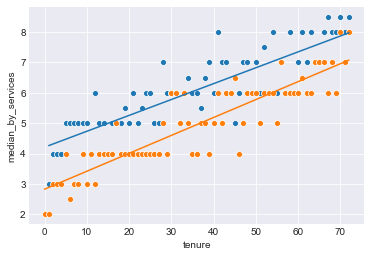

In [37]:
# сначала поднимем столбец с медианами
telecom_df_for_services_by_tenure_churn.rename(columns={'services': 'median_by_services'}, inplace=True)
# затем посмотрим на сгруппированые значения
telecom_df_for_services_by_tenure_churn['values'] = telecom_df[['Churn', 'tenure', 'services']]\
                                                .groupby(['Churn', 'tenure'])['services'].apply(list)\
                                                .reset_index()['services']
# распределим по группам оттока
telecom_df_for_services_by_tenure_churn['clusters_centers'] = 0
for churn in ['Yes', 'No']:
    # заведем переменные, куда внесём группы по оттоку
    data = telecom_df_for_services_by_tenure_churn[telecom_df_for_services_by_tenure_churn['Churn'] == churn]
    x = data['tenure']
    y = data['median_by_services']
    # расчитаем тренд каждой группы
    trend_model = np.polyfit(x, y, 1)
    trendline = np.poly1d(trend_model)
    # заведём новый столбец со значенями центров кластеров
    telecom_df_for_services_by_tenure_churn\
    .loc[telecom_df_for_services_by_tenure_churn['Churn'] == churn, 'clusters_centers'] = trendline(x)
    # отобразим результат для проверки
    sns.scatterplot(x, y)
    plt.plot(x, trendline(x))
plt.show()

In [38]:
# а теперь сгруппируем просто по tenure, таким образом объединим центры двух класетров
telecom_df_for_high_risk_groupby_2 = telecom_df_for_monthlycharges_by_tenure_churn\
                                  .groupby('tenure')['clusters_centers']\
                                  .apply(list)\
                                  .reset_index()
print(telecom_df_for_high_risk_groupby_2)

    tenure                         clusters_centers
0        0                      [43.70613661606816]
1        1    [44.2776556522276, 75.97115677321153]
2        2   [44.84917468838705, 76.37304515831669]
3        3  [45.420693724546496, 76.77493354342184]
4        4   [45.99221276070595, 77.17682192852699]
..     ...                                      ...
68      68  [82.56943107491054, 102.89767857525669]
69      69     [83.14095011107, 103.29956696036186]
70      70    [83.71246914722944, 103.701455345467]
71      71  [84.28398818338889, 104.10334373057215]
72      72   [84.85550721954834, 104.5052321156773]

[73 rows x 2 columns]


In [39]:
# первая строчка осталась без второго значения, дадим второе значение 75
telecom_df_for_high_risk_groupby_2.iloc[0, 1].append(75)
# теперь объединим полученный датасет с основным
telecom_df_for_high_risk = telecom_df.merge(telecom_df_for_high_risk_groupby_2)
# пора посмотреть к какому кластеру значения столбца services каждого объекта ближе
telecom_df_for_high_risk['high_risk_by_services'] = telecom_df_for_high_risk[['services', 'clusters_centers']]\
.apply(lambda x: np.argmin([euclidean(x['services'], i) for i in x['clusters_centers']]), axis=1)
telecom_df_for_high_risk['Churn'].replace({'Yes':1, 'No':0}, inplace=True)
# посчитаем процент правильных ответов
print('Процент совпадений -',\
      accuracy_score(telecom_df_for_high_risk['Churn'], telecom_df_for_high_risk['high_risk_by_services']))

Процент совпадений - 0.7348813899097895


Неплохое совпадение - неплохой инсайт. Будем надеяться это нам поможет.

In [40]:
# добавим получившийся столбец к основному датасету
telecom_df = pd.merge(telecom_df, telecom_df_for_high_risk[['customerID', 'high_risk_by_services']])
telecom_df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,services,tenure_years,MonthlyCharges_group,high_risk_by_monthlycharges,high_risk_by_services
0,7010-BRBUU,Male,No,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No,2,6,1,0,0
1,9688-YGXVR,Female,No,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.20,No,6,4,2,1,0
2,9286-DOJGF,Female,Yes,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes,4,4,2,0,0
3,6994-KERXL,Male,No,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.50,No,4,1,0,0,0
4,2181-UAESM,Male,No,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.50,No,4,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,0684-AOSIH,Male,No,Yes,No,1,Yes,No,Fiber optic,Yes,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.00,95.00,Yes,6,1,2,1,0
5982,5982-PSMKW,Female,No,Yes,Yes,23,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),91.10,2198.30,No,10,2,2,1,0
5983,8044-BGWPI,Male,No,Yes,Yes,12,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,21.15,306.05,No,2,1,1,0,0
5984,7450-NWRTR,Male,Yes,No,No,12,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.45,1200.15,Yes,7,1,2,1,0


## 2. Построчная "чистка" данных.
### 2.1. Исключение выбросов (outliers).
По результатам исследования в п.2.4 разведочного анализа данных можно заключить, что выбросов не присутсвует.
### 2.2. Исключение внутренних ошибок (inliers).
Изучим столбцы *PhoneService* и *MultipleLines* на предмет ошибок. 

In [41]:
print(len(telecom_df[(telecom_df['PhoneService'] == 'No')\
    & ((telecom_df['MultipleLines'] == 'Yes') | (telecom_df['MultipleLines'] == 'No'))]))
print(len(telecom_df[(telecom_df['PhoneService'] == 'Yes') & (telecom_df['MultipleLines'] == 'No phone service')]))

0
0


Теперь проверим признаки, связанные с *InternetService*.

In [42]:
internetservices = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
for column in internetservices:
    print(len(telecom_df[(telecom_df['InternetService'] == 'No')
        & ((telecom_df[column] == 'Yes') | (telecom_df[column] == 'No'))]))

0
0
0
0
0
0


Собственно, и в этих столбцах не обнаружены ошибки. Кажется в датасете нет никаких внутренних ошибок.

## 3. Удаление маловажных признаков.
Удалим следующие столбцы:
- customerID - он нам никак не поможет в предсказании,
- tenure - слишком много значений для модели классификации, это не есть хорошо, к тому же мы заменили его tenure_years
- TotalCharges - также слишком много различных значений, тем более он сильно коррелирует с tenure,
- MonthlyCharges - заменён MonthlyCharges_group,
- services - слишком много различных значений, сильно коррелирует с MonthlyCharges.

In [43]:
telecom_df_for_ml =\
telecom_df.drop(['customerID', 'tenure', 'TotalCharges', 'MonthlyCharges', 'services'], axis=1)

## 4. Кодирование значения признаков.

In [44]:
from sklearn.preprocessing import LabelEncoder


# создадим функцию, которая будет кодировать данные в столбцах
def transform(df):
    transform_df = df.copy()
    le_dict = {column:LabelEncoder() for column in df.columns}
    for column, le_model in le_dict.items():
        le_dict[column] = le_model.fit(df[column])
        transform_df[column] = le_dict[column].transform(df[column])
    return transform_df, le_dict

# а эта функция будет декодировать данные в столбцах на основе передаваемого датасета и словаря енкодеров
def inverse_transform(transform_df, le_dict):
    inverse_transform_df = transform_df.copy()
    for column, le_model in le_dict.items():
        inverse_transform_df[column] = le_dict[column].inverse_transform(transform_df[column])
    return inverse_transform_df, le_dict

df_for_learning = transform(telecom_df_for_ml)[0]

___

# Машинное обучение.

## 1. Выбор метрики.
Стоит задача бинарной классификации. К тому же один параметр ('Churn' - 'Yes') важнее другого ('Churn' - 'No'). В данной задаче нам важно отследить и предотвратить отток, а это значит, что нам важнее правильно предсказать отток, нежели тех, кто решил остаться в компании. Для контроля этого параметра прекрасно подходит метрика *Recall*.
В дополнение, отличным показателем правильности работы нашей модели будет метрика *AUC-ROC*.

## 2. Выбор и обучение оптимального алгоритма.
### 2.1. Обучение базовых алгоритмов.
Подготовим данные для обучения.

In [45]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split

# разделим датасет на фичи и цели
x = df_for_learning.drop('Churn', axis=1)
y = df_for_learning['Churn']
# а теперь разделим фичи и цели на тренировочные и тестовые
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
# также будем применять кросс-валидацию
skf = StratifiedKFold(n_splits=5, random_state=0)
# для некоторых алгоритмов нам будет необходимо иметь признаки и цели одновременно
train, test = train_test_split(df_for_learning, test_size=0.2, random_state=0)

Импортируем нужные алгоритмы библиотеки *sklearn*.

In [46]:
from sklearn.tree import ExtraTreeClassifier, DecisionTreeClassifier

from sklearn.svm import SVC, NuSVC, OneClassSVM, LinearSVC

from sklearn.neural_network import MLPClassifier

from sklearn.neighbors import KNeighborsClassifier, NearestCentroid

from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB, CategoricalNB, ComplementNB

from sklearn.linear_model import LogisticRegressionCV, ElasticNetCV, RidgeClassifierCV

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.metrics import recall_score, roc_auc_score

In [47]:
# составим список классификаторов
base_classifiers = [ExtraTreeClassifier, DecisionTreeClassifier, SVC, NuSVC, OneClassSVM, LinearSVC, MLPClassifier,
                    KNeighborsClassifier, NearestCentroid, BernoulliNB, GaussianNB, MultinomialNB, CategoricalNB,
                    ComplementNB, LogisticRegressionCV, RidgeClassifierCV,
                    LinearDiscriminantAnalysis]
# результаты "прогона" базовых классификаторов
classifier_names, recall_scores, roc_auc_scores = [], [], []
for classifier in base_classifiers:
    # "завернём" в оболочку try-except алгоритмы и зададим параметр random_state=0 для репрезентативности результатов
    try:
        estimator = classifier(random_state=0)
    except TypeError:
        estimator = classifier()
    # обучим модель
    model = estimator.fit(x_train, y_train)
    # получим предсказанные значения для тестовых фич
    y_pred = model.predict(x_test)
    # специально для классификатора OneClassSVM, который даёт предсказания в виде -1, 1, создадим условие замены
    if -1 in y_pred:
        y_pred[y_pred == -1] = 0
    # специально для классов ElasticNet и ElasticNetCV, которые дают предсказания в виде вероятности, создадим условие замены
    y_pred = [0 if i <= 0.5 else 1 for i in y_pred]
    # посчитаем метрики и занесём результаты в соответствующие списки
    classifier_names += [classifier.__name__]
    roc_auc_scores += [roc_auc_score(y_test, y_pred)]
    recall_scores += [recall_score(y_test, y_pred)]
# создадим датафрейм с результатами
base_classifiers_df = pd.DataFrame(data=zip(classifier_names, roc_auc_scores, recall_scores),
                                   columns=['classifier', 'roc_auc', 'recall'])
# отсортируем датафрейм по roc-auc метрике в порядке убывания, а также проиндексируем по порядку
base_classifiers_df = base_classifiers_df.sort_values(['roc_auc', 'recall'], ascending=False).reset_index(drop=True)
base_classifiers_df

,classifier,roc_auc,recall
0,CategoricalNB,0.753350,0.815873
1,GaussianNB,0.750576,0.717460
2,BernoulliNB,0.744004,0.711111
3,MultinomialNB,0.739438,0.647619
4,ComplementNB,0.737134,0.777778
5,LinearDiscriminantAnalysis,0.724318,0.546032
6,LinearSVC,0.722499,0.533333
7,LogisticRegressionCV,0.714099,0.498413
8,RidgeClassifierCV,0.709569,0.498413
9,SVC,0.707406,0.479365


### 2.2. Подбор гиперпараметров для базовых алгоритмов.
Для дальнейшего подбора гиперпараметров выберем первые пять **различных** алгоритмов: *CategoricalNB, LinearDiscriminantAnalysis, LogisticRegressionCV, RidgeClassifierCV, PassiveAggressiveClassifier*. Для подбора оптимальных параметров используем *GridSearch*.

In [48]:
classifier_names_GS, roc_auc_scores_GS, recall_scores_GS  = [], [], []

In [49]:
%%time

from sklearn.model_selection import GridSearchCV


cnb = CategoricalNB(alpha=0.52)
# cnb = CategoricalNB()
cnb_params = {
# 'alpha':np.arange(0, 1, 0.01),
}
cnb_GS = GridSearchCV(estimator=cnb, param_grid=cnb_params, cv=skf, n_jobs=-1)
cnb_GS_model = cnb_GS.fit(x_train, y_train)
cnb_y_pred = cnb_GS_model.predict(x_test)
classifier_names_GS += ['CategoricalNB']
roc_auc_scores_GS += [roc_auc_score(y_test, cnb_y_pred)]
recall_scores_GS += [recall_score(y_test, cnb_y_pred)]
print('cnb_GS_model.best_params_', cnb_GS_model.best_params_)
print('roc_auc', roc_auc_score(y_test, cnb_y_pred))
print('recall', recall_score(y_test, cnb_y_pred))

cnb_GS_model.best_params_ {}
roc_auc 0.7533498714699168
recall 0.8158730158730159
Wall time: 1.09 s


In [50]:
%%time

gnb = GaussianNB(var_smoothing=1e-10)
# gnb = GaussianNB()
gnb_params = {
# 'var_smoothing':np.arange(1e-10, 1e-8, 1e-10),
}
gnb_GS = GridSearchCV(estimator=gnb, param_grid=gnb_params, cv=skf, n_jobs=-1)
gnb_GS_model = gnb_GS.fit(x_train, y_train)
gnb_y_pred = gnb_GS_model.predict(x_test)
classifier_names_GS += ['GaussianNB']
roc_auc_scores_GS += [roc_auc_score(y_test, gnb_y_pred)]
recall_scores_GS += [recall_score(y_test, gnb_y_pred)]
print('gnb_GS_model.best_params_', gnb_GS_model.best_params_)
print('roc_auc', roc_auc_score(y_test, gnb_y_pred))
print('recall', recall_score(y_test, gnb_y_pred))

gnb_GS_model.best_params_ {}
roc_auc 0.7505761383451078
recall 0.7174603174603175
Wall time: 591 ms


In [51]:
%%time

lda = LinearDiscriminantAnalysis(solver='svd', store_covariance=True, tol=10e-08)
# lda = LinearDiscriminantAnalysis()
lda_params = {
# 'solver':['svd', 'lsqr'],
# 'store_covariance':[True, False],
# 'tol':np.arange(1.0e-8, 2.0e-6, 5.0e-8)
}
lda_GS = GridSearchCV(estimator=lda, param_grid=lda_params, cv=skf, n_jobs=-1)
lda_GS_model = lda_GS.fit(x_train, y_train)
lda_y_pred = lda_GS_model.predict(x_test)
classifier_names_GS += ['LinearDiscriminantAnalysis']
roc_auc_scores_GS += [roc_auc_score(y_test, lda_y_pred)]
recall_scores_GS += [recall_score(y_test, lda_y_pred)]
print('lda_GS_model.best_params_', lda_GS_model.best_params_)
print('roc_auc', roc_auc_score(y_test, lda_y_pred))
print('recall', recall_score(y_test, lda_y_pred))

lda_GS_model.best_params_ {}
roc_auc 0.7243182512718186
recall 0.546031746031746
Wall time: 98.7 ms


In [52]:
%%time

lrcv = LogisticRegressionCV(Cs=5, cv=skf, dual=False, multi_class='auto', penalty='l1', solver='saga',
    refit=False, random_state=0, n_jobs=-1)
# lrcv = LogisticRegressionCV()
lrcv_params = {
# 'Cs':range(5, 14),
# 'cv':[range(2, 5), skf, None],
# 'dual':[True, False],
# 'penalty':['l1', 'l2', 'elasticnet'],
# 'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
# 'refit':[True, False],
# 'multi_class':['auto', 'ovr', 'multinomial']
}
lrcv_GS = GridSearchCV(estimator=lrcv, param_grid=lrcv_params, cv=skf, n_jobs=-1)
lrcv_GS_model = lrcv_GS.fit(x_train, y_train)
lrcv_y_pred = lrcv_GS_model.predict(x_test)
classifier_names_GS += ['LogisticRegressionCV']
roc_auc_scores_GS += [roc_auc_score(y_test, lrcv_y_pred)]
recall_scores_GS += [recall_score(y_test, lrcv_y_pred)]
print('lrcv_GS_model.best_params_', lrcv_GS_model.best_params_)
print('roc_auc', roc_auc_score(y_test, lrcv_y_pred))
print('recall', recall_score(y_test, lrcv_y_pred))

lrcv_GS_model.best_params_ {}
roc_auc 0.6876808858688813
recall 0.4444444444444444
Wall time: 653 ms


In [53]:
%%time

rccv = RidgeClassifierCV(cv=skf, fit_intercept=True, normalize=False, store_cv_values=False)
# rcсv = RidgeClassifierCV()
rccv_params = {
# 'fit_intercept':[True, False],
# 'normalize':[True, False],
# 'cv':[range(2, 5), skf, None],
# 'class_weight':['balanced', None],
# 'store_cv_values':[True, False],
}
rccv_GS = GridSearchCV(estimator=rccv, param_grid=rccv_params, cv=skf, n_jobs=-1)
rccv_GS_model = rccv_GS.fit(x_train, y_train)
rccv_y_pred = rccv_GS_model.predict(x_test)
classifier_names_GS += ['RidgeClassifierCV']
roc_auc_scores_GS += [roc_auc_score(y_test, rccv_y_pred)]
recall_scores_GS += [recall_score(y_test, rccv_y_pred)]
print('rccv_GS_model.best_params_', rccv_GS_model.best_params_)
print('roc_auc', roc_auc_score(y_test, rccv_y_pred))
print('recall', recall_score(y_test, rccv_y_pred))

rccv_GS_model.best_params_ {}
roc_auc 0.7095687501123515
recall 0.4984126984126984
Wall time: 240 ms


Нельзя обойти стороной классические для классификации алгоритмы - *DecisionTreeClassifier* и *KNeighborsClassifier*.

In [54]:
%%time

dtc = DecisionTreeClassifier(criterion='gini', max_depth=4, splitter='random', random_state=0)
# dtc = DecisionTreeClassifier()
dtc_params = {
# 'criterion':["gini", "entropy"],
# 'splitter':["best", "random"],
# 'max_depth':range(2, 7),
}
dtc_GS = GridSearchCV(estimator=dtc, param_grid=dtc_params, cv=skf, n_jobs=-1)
dtc_GS_model = dtc_GS.fit(x_train, y_train)
dtc_y_pred = dtc_GS_model.predict(x_test)
classifier_names_GS += ['DecisionTreeClassifier']
roc_auc_scores_GS += [roc_auc_score(y_test, dtc_y_pred)]
recall_scores_GS += [recall_score(y_test, dtc_y_pred)]
print('dtc_GS_model.best_params_', dtc_GS_model.best_params_)
print('roc_auc_score', roc_auc_score(y_test, dtc_y_pred))
print('recall_score', recall_score(y_test, dtc_y_pred))

dtc_GS_model.best_params_ {}
roc_auc_score 0.6801057002642507
recall_score 0.4666666666666667
Wall time: 82.8 ms


In [55]:
%%time

knc = KNeighborsClassifier(algorithm='ball_tree', n_neighbors=71, n_jobs =-1)
# knc = KNeighborsClassifier()
knc_params = {
# 'n_neighbors':range(50, 100),
# 'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
}
knc_GS = GridSearchCV(estimator=knc, param_grid=knc_params, cv=skf, n_jobs=-1)
knc_GS_model = knc_GS.fit(x_train, y_train)
knc_y_pred = knc_GS_model.predict(x_test)
classifier_names_GS += ['KNeighborsClassifier']
roc_auc_scores_GS += [roc_auc_score(y_test, knc_y_pred)]
recall_scores_GS += [recall_score(y_test, knc_y_pred)]
print('knc_GS_model.best_params_', knc_GS_model.best_params_)
print('roc_auc_score', roc_auc_score(y_test, knc_y_pred))
print('recall_score', recall_score(y_test, knc_y_pred))

knc_GS_model.best_params_ {}
roc_auc_score 0.7307968865160258
recall_score 0.5873015873015873
Wall time: 492 ms


In [56]:
# создадим датафрейм с результатами
base_classifiers_GS_df = pd.DataFrame(data=zip(classifier_names_GS, roc_auc_scores_GS, recall_scores_GS),
                                   columns=['classifier', 'roc_auc', 'recall'])
# отсортируем датафрейм по roc-auc метрике в порядке убывания, а также проиндексируем по порядку
base_classifiers_GS_df = base_classifiers_GS_df.sort_values(['roc_auc', 'recall'], ascending=False).reset_index(drop=True)
base_classifiers_GS_df

,classifier,roc_auc,recall
0,CategoricalNB,0.753350,0.815873
1,GaussianNB,0.750576,0.717460
2,KNeighborsClassifier,0.730797,0.587302
3,LinearDiscriminantAnalysis,0.724318,0.546032
4,RidgeClassifierCV,0.709569,0.498413
5,LogisticRegressionCV,0.687681,0.444444
6,DecisionTreeClassifier,0.680106,0.466667


Нам удалось улучшить результаты алгоритмов *LogisticRegressionCV, KNeighborsClassifier, DecisionTreeClassifier* и *RidgeClassifierCV*. Отлично, идем дальше. А дальше мы будем тестировать *ансамбли* алгоритмов.

### 2.3. Обучение ансамблей алгоритмов.  
Ансамбль алгоритмов использует несколько **(слабых)** обучающих алгоритмов с целью получения лучшей эффективности прогнозирования.  
Виды ансамблей:
- комитеты (BaggingClassifier, Random forest)
- бустинг (XGBoost)
- QLattice
- стекинг (StackingClassifier)


#### 2.3.1. Подбор гиперпараметров для ансамблей из комитетов.
Начнём с бэггинга. Для него же будет лучше, если взятые алгоритмы максимально нестабильны и сильно плавают от входных данных.
Поэтому чаще берут Регрессию и Деревья Решений, которым достаточно одной сильной аномалии в данных, чтобы поехала вся модель.
А вот Байеса и K-NN не берут никогда — они хоть и не самые точные, но очень стабильные.

In [57]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier


bc = BaggingClassifier(base_estimator=lrcv, n_estimators=1, max_features=19, oob_score=True, n_jobs=-1, random_state=0)
# bc = BaggingClassifier(n_jobs=-1, random_state=0)
bc_params = {
# 'base_estimator':[lda, lrcv, rccv, dtc],
# 'n_estimators':range(1, 9),
# 'max_features':range(16, 22),
# 'bootstrap_features':[True, False],
# 'oob_score':[True, False],
# 'warm_start':[True, False],
}
bc_GS = GridSearchCV(estimator=bc, param_grid=bc_params, cv=skf, n_jobs=-1)
bc_GS_model = bc_GS.fit(x_train, y_train)
bc_y_pred = bc_GS_model.predict(x_test)
classifier_names_GS += ['BaggingClassifier']
roc_auc_scores_GS += [roc_auc_score(y_test, bc_y_pred)]
recall_scores_GS += [recall_score(y_test, bc_y_pred)]
print('bc_GS_model.best_params_', bc_GS_model.best_params_)
print('roc_auc_score', roc_auc_score(y_test, bc_y_pred))
print('recall_score', recall_score(y_test, bc_y_pred))

bc_GS_model.best_params_ {}
roc_auc_score 0.6970932427331069
recall_score 0.4666666666666667


Как результат мы улучшили показатели LogisticRegressionCV. Что же, это тоже результат.
Теперь посмотрим как отработает RandomForestClassifier.

In [58]:
rfc = RandomForestClassifier(n_estimators=186,  max_depth=6, oob_score=True, warm_start=True, n_jobs=-1, random_state=0)
# rfc = RandomForestClassifier(n_jobs=-1, random_state=0)
rfc_params = {
# 'n_estimators':range(1000, 200),
# 'max_depth':range(6, 50),
# 'criterion':['gini', 'entropy'],
# 'oob_score':[True, False],
# 'warm_start':[True, False]
}
rfc_GS = GridSearchCV(estimator=rfc, param_grid=rfc_params, cv=skf, n_jobs=-1)
rfc_GS_model = rfc_GS.fit(x_train, y_train)
rfc_y_pred = rfc_GS_model.predict(x_test)
classifier_names_GS += ['RandomForestClassifier']
roc_auc_scores_GS += [roc_auc_score(y_test, rfc_y_pred)]
recall_scores_GS += [recall_score(y_test, rfc_y_pred)]
print('rfc_GS_model.best_params_', rfc_GS_model.best_params_)
print('roc_auc_score', roc_auc_score(y_test, rfc_y_pred))
print('recall_score', recall_score(y_test, rfc_y_pred))

rfc_GS_model.best_params_ {}
roc_auc_score 0.7030991029858528
recall_score 0.473015873015873


Мы немного улучшили результаты базового классификатора (DecisionTreeClassifier), использовав его в ансамбле. Положительный результат.

#### 2.3.2. Подбор гиперпараметров для ансамблей типа бустинг.
Начнём с алгоритма **XGBoost (eXtreme Gradient Boosting)**. Это эффективная реализация градиентного бустинга на деревьях решений.  
Создадим первый классификатор с начальными значениями. Начнём "тюнинг" параметров с *max_depth* и *min_child_weight*, так как они больше всего влияют на конечный результат.

In [59]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier


xgbc = XGBClassifier(
    objective='binary:logistic',
    n_jobs=-1,
    random_state=0,
    learning_rate=0.1,
    gamma=0,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=1
)
xgbc_params = {
    'max_depth':range(1,10),
    'min_child_weight':range(8,20)
}
xgbc_GS = GridSearchCV(
    estimator=xgbc,
    param_grid=xgbc_params,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1)
xgbc_GS_model = xgbc_GS.fit(x_train, y_train)
y_pred = xgbc_GS_model.predict(x_test)
print('xgbc_GS_model.best_params_', xgbc_GS_model.best_params_)
print('roc_auc_score', roc_auc_score(y_test, y_pred))
print('recall_score', recall_score(y_test, y_pred))

xgbc_GS_model.best_params_ {'max_depth': 3, 'min_child_weight': 13}
roc_auc_score 0.7229538550036851
recall_score 0.5365079365079365


Отлично мы получили необходимые значения параметров *max_depth (3) и min_child_weight (13)* и результат по AUC-ROC (0.723). Продолжим "тюнинг" алгоритма параметром *gamma* и *scale_pos_weight*.

In [60]:
xgbc = XGBClassifier(
    objective='binary:logistic',
    n_jobs=-1,
    random_state=0,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    max_depth=3,
    min_child_weight=13
)
xgbc_params = {
    'gamma':np.arange(0, 0.1, 0.01),
    'scale_pos_weight':np.arange(0.5, 3, 0.1)
}
xgbc_GS = GridSearchCV(
    estimator=xgbc,
    param_grid=xgbc_params,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1)
xgbc_GS_model = xgbc_GS.fit(x_train, y_train)
y_pred = xgbc_GS_model.predict(x_test)
print('xgbc_GS_model.best_params_', xgbc_GS_model.best_params_)
print('roc_auc_score', roc_auc_score(y_test, y_pred))
print('recall_score', recall_score(y_test, y_pred))

xgbc_GS_model.best_params_ {'gamma': 0.0, 'scale_pos_weight': 2.0999999999999996}
roc_auc_score 0.7605637347426702
recall_score 0.7555555555555555


Мы нашли лучшее значения параметров *gamma (0) и scale_pos_weight (2.1)*, а также улучшили результат алгоритма (0.7606). Подберём значения параметров *subsample* и *colsample_bytree*.

In [61]:
xgbc = XGBClassifier(
    objective='binary:logistic',
    n_jobs=-1,
    random_state=0,
    learning_rate=0.1,
    max_depth=3,
    min_child_weight=13,
    gamma=0,
    scale_pos_weight=2.1,
)
xgbc_params = {
    'subsample':np.arange(0.1, 1, 0.05),
    'colsample_bytree':np.arange(0.1, 1, 0.05),
}
xgbc_GS = GridSearchCV(
    estimator=xgbc,
    param_grid=xgbc_params,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1)
xgbc_GS_model = xgbc_GS.fit(x_train, y_train)
xgbc_y_pred = xgbc_GS_model.predict(x_test)
print('xgbc_GS_model.best_params_', xgbc_GS_model.best_params_)
print('roc_auc_score', roc_auc_score(y_test, xgbc_y_pred))
print('recall_score', recall_score(y_test, xgbc_y_pred))

xgbc_GS_model.best_params_ {'colsample_bytree': 0.20000000000000004, 'subsample': 0.7000000000000002}
roc_auc_score 0.7621510363299717
recall_score 0.7587301587301587


Конечная модель.

In [62]:
xgbc = XGBClassifier(
    objective='binary:logistic',
    n_jobs=-1,
    random_state=0,
    learning_rate=0.1,
    max_depth=3,
    min_child_weight=13,
    gamma=0,
    scale_pos_weight=2.1,
    subsample=0.7,
    colsample_bytree=0.2)

xgbc_model = xgbc.fit(x_train, y_train)
xgbc_y_pred = xgbc_model.predict(x_test)
classifier_names_GS += ['XGBClassifier']
roc_auc_scores_GS += [roc_auc_score(y_test, xgbc_y_pred)]
recall_scores_GS += [recall_score(y_test, xgbc_y_pred)]
print('roc_auc_score', roc_auc_score(y_test, xgbc_y_pred))
print('recall_score', recall_score(y_test, xgbc_y_pred))

roc_auc_score 0.7621510363299717
recall_score 0.7587301587301587


Мы получили оптимальные значения параметров *colsample_bytree (0.2) и subsample (0.7)*. Итоговая оценка - 0.762.

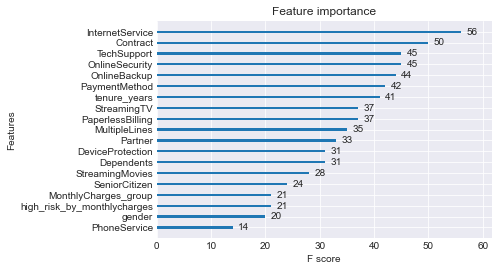

In [63]:
xgb.plot_importance(xgbc_model)

#### 2.3.3. Обучение алгоритма QLattice.

In [64]:
%%time

import feyn


ql = feyn.QLattice(
    url="нщг",
    api_token="971144fdf43447db928d7144e1cfff58")
train, test = train_test_split(df_for_learning, test_size = 0.2, random_state=0)

qgraph = ql.get_qgraph(train.columns, output='Churn', max_depth=100)
qgraph.fit(train)

no_updates = 20
for _ in range(no_updates):
    # Fit a subset of the QGraph with your local data.
    qgraph.fit(train)
    # Select the best performing graphs from our fitted QGraph
    best_graphs = qgraph.best()
    # Feed the experience back to the QLattice so it gets smarter for subsequent calls.
    ql.update(best_graphs)
# Selection of best graph
best_graph = best_graphs[0]

# результат работы алгоритма
y_pred = best_graph.predict(test.drop('Churn', axis=1))
# Round off the results to discretize to 0 or 1 for classification.
ql_y_pred = y_pred.round()
classifier_names_GS += ['QLattice']
roc_auc_scores_GS += [roc_auc_score(y_test, ql_y_pred)]
recall_scores_GS += [recall_score(y_test, ql_y_pred)]
print('roc_auc_score', roc_auc_score(y_test, ql_y_pred))
print('recall_score', recall_score(y_test, ql_y_pred))

MissingSchema: Invalid URL 'нщг/api/v1/qlattice': No schema supplied. Perhaps you meant http://нщг/api/v1/qlattice?

#### 2.3.4. Подбор гиперпараметров для ансамбля типа стекинг.
Алгоритм стэкинга можно реализовать в однослойном и многослойном варианте. Рассмотрим однослойный стэкинга. Реализуем его в GridSearch оболочке.

In [65]:
# создадим список наших обученных алгоритмов
estimators = [cnb, gnb, knc, lda, rccv, lrcv, dtc]

In [66]:
# функция получения матриц метапризнаков
def meta_matrix(estimators, x_train, x_test, y_train, cv=5):
    from sklearn.model_selection import cross_val_predict

    
    meta_mtrx_train = np.empty((len(x_train), len(estimators)))
    meta_mtrx_test = np.empty((len(x_test), len(estimators)))
    for n, estimator in enumerate(estimators):
        meta_mtrx_train[:, n] = cross_val_predict(estimator, x_train, y_train, cv=cv, method='predict')
        meta_mtrx_test[:, n] = estimator.fit(x_train, y_train).predict(x_test)
    return meta_mtrx_train, meta_mtrx_test

# две матрицы метапризнаков (тренировочная и тестовая)
meta_mtrx_train, meta_mtrx_test = meta_matrix(estimators, x_train, x_test, y_train)

В качеств мета-алгоритма выбираем XGBoost. Подберем гиперпараметры аналогично пункту 2.3.2

In [67]:
xgb_stacking = XGBClassifier(
    objective='binary:logistic',
    n_jobs=-1,
    random_state=0,
    learning_rate=0.1,
    gamma=0,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=1
)
xgb_stacking_params = {
    'max_depth':range(1, 10),
    'min_child_weight':range(1, 15)
}
xgb_stacking_GS = GridSearchCV(
    estimator=xgb_stacking,
    param_grid=xgb_stacking_params,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1)
xgb_stacking_GS_model = xgb_stacking_GS.fit(meta_mtrx_train, y_train)
stacking_y_pred = xgb_stacking_GS_model.predict(meta_mtrx_test)
print('xgb_stacking_GS_model.best_params_', xgb_stacking_GS_model.best_params_)
print('roc_auc_score', roc_auc_score(y_test, stacking_y_pred))
print('recall_score', recall_score(y_test, stacking_y_pred))

xgb_stacking_GS_model.best_params_ {'max_depth': 2, 'min_child_weight': 9}
roc_auc_score 0.7194538819680383
recall_score 0.5555555555555556


In [68]:
xgb_stacking = XGBClassifier(
    objective='binary:logistic',
    n_jobs=-1,
    random_state=0,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    max_depth=2,
    min_child_weight=9
)
xgb_stacking_params = {
    'gamma':np.arange(5, 7, 0.1),
    'scale_pos_weight':np.arange(0, 5, 0.5)
}
xgb_stacking_GS = GridSearchCV(
    estimator=xgb_stacking,
    param_grid=xgb_stacking_params,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1)
xgb_stacking_GS_model = xgb_stacking_GS.fit(meta_mtrx_train, y_train)
stacking_y_pred = xgb_stacking_GS_model.predict(meta_mtrx_test)
print('xgb_stacking_GS_model.best_params_', xgb_stacking_GS_model.best_params_)
print('roc_auc_score', roc_auc_score(y_test, stacking_y_pred))
print('recall_score', recall_score(y_test, stacking_y_pred))

xgb_stacking_GS_model.best_params_ {'gamma': 6.799999999999994, 'scale_pos_weight': 3.5}
roc_auc_score 0.7533498714699168
recall_score 0.8158730158730159


In [69]:
xgb_stacking = XGBClassifier(
    objective='binary:logistic',
    n_jobs=-1,
    random_state=0,
    learning_rate=0.1,
    max_depth=2,
    min_child_weight=9,
    gamma=6.8,
    scale_pos_weight=3.5
)
xgb_stacking_params = {
    'subsample':np.arange(0.1, 1, 0.05),
    'colsample_bytree':np.arange(0.1, 1, 0.05),
}
xgb_stacking_GS = GridSearchCV(
    estimator=xgb_stacking,
    param_grid=xgb_stacking_params,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1)
xgb_stacking_GS_model = xgb_stacking_GS.fit(meta_mtrx_train, y_train)
stacking_y_pred = xgb_stacking_GS_model.predict(meta_mtrx_test)
print('xgb_GS_model.best_params_', xgb_stacking_GS_model.best_params_)
print('roc_auc_score', roc_auc_score(y_test, stacking_y_pred))
print('recall_score', recall_score(y_test, stacking_y_pred))

xgb_GS_model.best_params_ {'colsample_bytree': 0.1, 'subsample': 0.6500000000000001}
roc_auc_score 0.7533498714699168
recall_score 0.8158730158730159


In [70]:
xgb_stacking = XGBClassifier(
    objective='binary:logistic',
    n_jobs=-1,
    random_state=0,
    learning_rate=0.1,
    max_depth=2,
    min_child_weight=9,
    gamma=6.8,
    scale_pos_weight=3.5,
    subsample=0.65,
    colsample_bytree=0.1
    )

xgb_stacking_model = xgb_stacking.fit(meta_mtrx_train, y_train)
stacking_y_pred = xgb_stacking_model.predict(meta_mtrx_test)
classifier_names_GS += ['Stacking']
roc_auc_scores_GS += [roc_auc_score(y_test, stacking_y_pred)]
recall_scores_GS += [recall_score(y_test, stacking_y_pred)]
print('roc_auc_score', roc_auc_score(y_test, stacking_y_pred))
print('recall_score', recall_score(y_test, stacking_y_pred))

roc_auc_score 0.7533498714699168
recall_score 0.8158730158730159


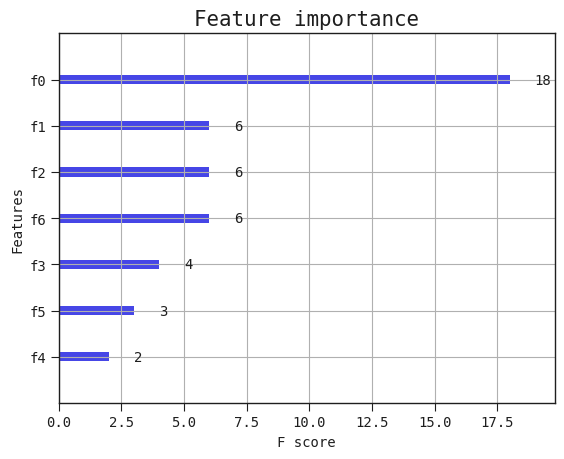

In [71]:
xgb.plot_importance(xgb_stacking_model)

Итак, мы подобрали лучшие параметра для мета-алгоритма. Занесем результат работы в общую таблицу.

In [72]:
# создадим датафрейм с результатами
base_classifiers_GS_df = pd.DataFrame(data=zip(classifier_names_GS, roc_auc_scores_GS, recall_scores_GS),
                                   columns=['classifier', 'roc_auc', 'recall'])
# отсортируем датафрейм по roc-auc метрике в порядке убывания, а также проиндексируем по порядку
base_classifiers_GS_df = base_classifiers_GS_df.sort_values(['roc_auc', 'recall'], ascending=False).reset_index(drop=True)
base_classifiers_GS_df

,classifier,roc_auc,recall
0,XGBClassifier,0.762151,0.758730
1,CategoricalNB,0.753350,0.815873
2,Stacking,0.753350,0.815873
3,GaussianNB,0.750576,0.717460
4,KNeighborsClassifier,0.730797,0.587302
5,LinearDiscriminantAnalysis,0.724318,0.546032
6,RidgeClassifierCV,0.709569,0.498413
7,RandomForestClassifier,0.703099,0.473016
8,BaggingClassifier,0.697093,0.466667
9,LogisticRegressionCV,0.687681,0.444444


## 3. Сравнение качества моделей
Рассмотрим качество первых трех различных по результатам моделей (*XGBClassifier, CategoricalNB, GaussianNB*). Мы не рассмотрим *Stacking* так как он полностью подстроился под ответы одного их входящих в него алгоритмов (*CategoricalNB*).
### 3.1. Матрица ошибок
#### 3.1.1. Матрица ошибок для *XGBClassifier*

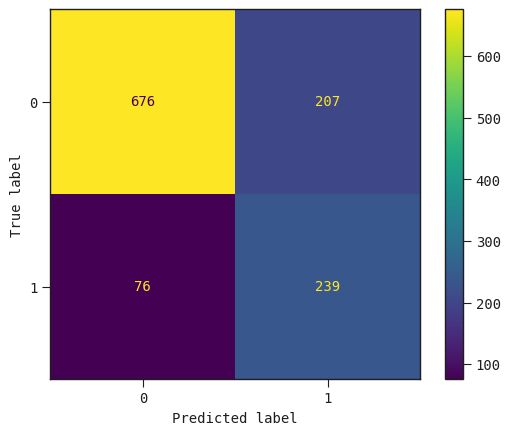

In [73]:
from sklearn.metrics import plot_confusion_matrix


plot_confusion_matrix(xgbc_model, x_test, y_test)
plt.show()

В нашей целевой группе ('Churn' - 'Yes') 315 человек, из них алгоритмом 239 определены верно и 76 неверно.

#### 3.1.2. Матрица ошибок для *CategoricalNB*

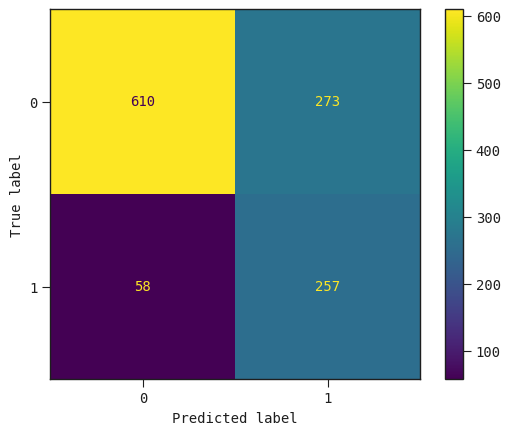

In [74]:
plot_confusion_matrix(cnb_GS_model, x_test, y_test)
plt.show()

В нашей целевой группе ('Churn' - 'Yes') 315 человек, из них алгоритмом 257 определены верно и 58 неверно.

#### 3.1.3. Матрица ошибок для *GaussianNB*

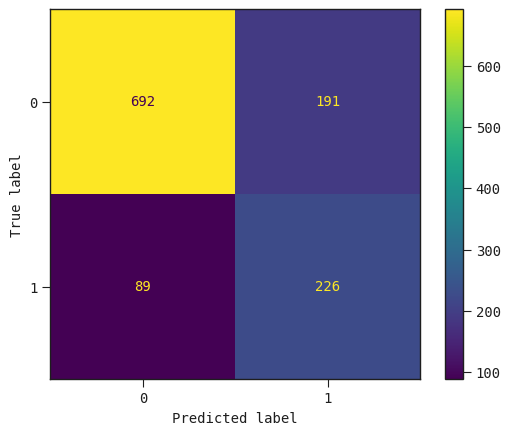

In [75]:
plot_confusion_matrix(gnb_GS_model, x_test, y_test)
plt.show()

В нашей целевой группе ('Churn' - 'Yes') 315 человек, из них алгоритмом 226 определены верно и 89 неверно.

### 3.2. ROC-кривая
Отобразим ROC-кривую для трех наших классификаторов.

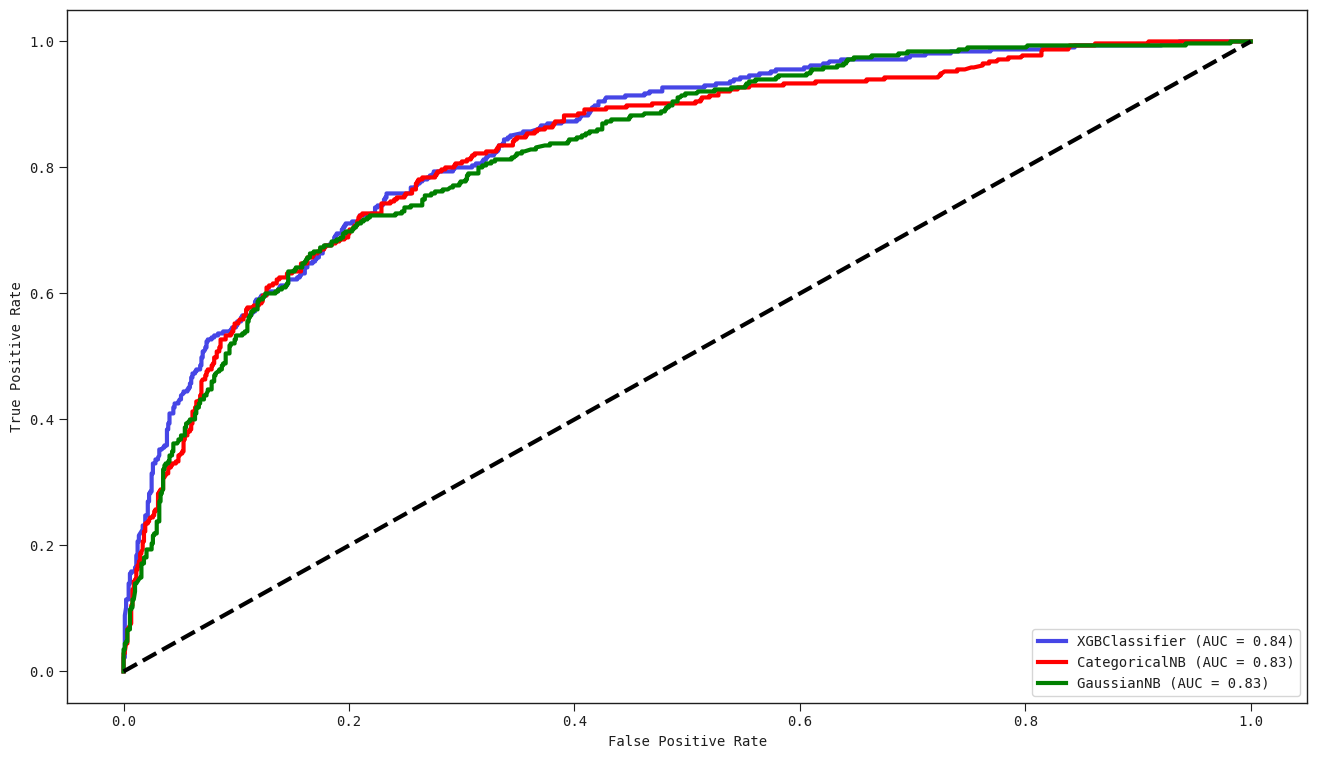

In [76]:
from sklearn.metrics import plot_roc_curve

fig, ax = plt.subplots(figsize=(16, 9))
plot_roc_curve(xgbc_model, x_test, y_test, ax=ax, name='XGBClassifier')
plot_roc_curve(cnb_GS_model, x_test, y_test, color='r', ax=ax, name='CategoricalNB')
plot_roc_curve(gnb_GS_model, x_test, y_test, color='g', ax=ax, name='GaussianNB')
plt.plot([0, 1], [0, 1], 'k--')
plt.show()

Почти все три отработали одинаково. Хотя можно заметить, что бустинг чаще других появляется сверху остальных графиков.

# Вывод

Мы проработали несколько алгоритмов обучения. Какие-то справились лучше, какие-то хуже. Заметно отличились в лучшую сторону алгоритмы *XGBClassifier, CategoricalNB, Stacking* и *GaussianNB*. Однако именно *CategoricalNB* имеет высокие показатели метрики *recall*, так важной нам. Поэтому считаем, что этот алгоритм подходит лучше остальных для решения задачи оттока клиентов рассматриваемой компании.  
**Готовый алгоритм:**

In [77]:
cnb = CategoricalNB(alpha=0.52)
cnb_model = cnb.fit(x_train, y_train)
cnb_y_pred = cnb_model.predict(x_test)
print('roc_auc', roc_auc_score(y_test, cnb_y_pred))
print('recall', recall_score(y_test, cnb_y_pred))

roc_auc 0.7533498714699168
recall 0.8158730158730159
